In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

In [87]:
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout, VBox, HBox, IntSlider, Label, RadioButtons, SelectMultiple, Checkbox
from IPython.display import SVG


In [4]:
%%time

dataset_name = "W13_comb"

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
print("BES_Panel", BES_Panel.shape )

####

BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
print("BES_non_numeric",  BES_non_numeric.shape )

# BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
# print("BES_reduced",  BES_reduced.shape )

# BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
# print("BES_reduced_with_na", BES_reduced_with_na.shape )

# fname = data_subfolder + "new_old_col_names.pkl"
# with open(fname, "rb") as f:
#     new_old_col_names = pickle.load(f) 

BES_Panel (69486, 5173)
BES_numeric (69486, 4993)
var_type (5173, 13)
BES_non_numeric (69486, 125)
Wall time: 17min 49s


In [276]:
Treatment = "SankeyDiagrams"
output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [2]:
# import numpy as np
# import pandas as pd
# %matplotlib inline
# import matplotlib.pyplot as plt
# from matplotlib import colors
# import gc
# import re

# from sklearn import datasets
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from itertools import cycle
# from IPython.display import display
# import pickle, os

# import seaborn as sns

# BES_data_folder = "../BES_analysis_data/"
# BES_code_folder = "../BES_analysis_code/"

# # from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE

In [3]:
# gc.collect()

In [3]:
# # %%time # 10 mins
# # load BES Panel for Wave 10
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta")
# # big!
# print( BES_Panel.shape )

(64689, 4247)


In [3]:
# %%time
# # Load BES Panel for Wave 8
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W8_v1.3.dta") # 130Mb
# #(31409, 733)

# # BES_Panel = pd.read_stata(BES_data_folder+BES2015_W8_v1.6.dta")

# print( BES_Panel.shape )

# read back in later with this
# BES_Panel= pd.read_pickle("BES_W10_small.pkl")

(31409, 733)
Wall time: 12.6 s


In [14]:
variables_of_interest = [x for x in BES_Panel.columns if re.match("al(_scale|\d)|lr(_scale|\d)|personality|"+
                                          "euRefVote|generalElectionVote|wave|wt_full|"+
                                          "profile|marital|gender|edlevel|ageGroup|country|housing|countryOfBirth",x)]
len(variables_of_interest)

BES_Panel[cols].to_pickle(dataset_name+"_small.pkl")

209

In [118]:
# [x for x in BES_Panel.columns if re.match("wt_",x)]

In [119]:
# variables_of_interest
#wt_full_W1_W13

In [4]:
# for development, lets pare down the BES_Panel dataset to just the columns we're working with now
cols = ['profile_past_vote_2005',
        'profile_past_vote_2010',
        'profile_past_vote_2015',
        'al_scaleW10','al1W10','al2W10','al3W10','al4W10','al5W10',
        'lr_scaleW10','lr1W10','lr2W10','lr3W10','lr4W10','lr5W10',
        'marital', 'profile_education_age', 'profile_ethnicity',
        'gender', 'profile_household_size', 'housing',
        'profile_newspaper_readership_201', 'profile_household_children',
        'profile_gross_household', 'profile_gross_personal',
        'edlevel','ageGroup','country','countryOfBirth',
        'personality_agreeableness', 'personality_conscientiousness',
        'personality_extraversion', 'personality_neuroticism',
        'personality_openness',
        "euRefVoteW1","euRefVoteW2","euRefVoteW3",
        "euRefVoteW4","euRefVoteW6","euRefVoteW8","euRefVoteW10"]

for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:
    cols.append( "generalElectionVote"+wave )
    cols.append( "wave" + wave.replace("W","") )
    cols.append( "wt_full_"+wave )
    
BES_Panel[cols].to_pickle("BES_W10_small.pkl")

# read back in later with this
# BES_Panel= pd.read_pickle("BES_W10_small.pkl")

In [5]:
party_list = list( BES_Panel[ ['profile_past_vote_2005','profile_past_vote_2010','profile_past_vote_2015' ] ].stack().unique() )
party_list.append('I would not vote')
replace_dict = {'Labour Party':"LAB", 
 'United Kingdom Independence Party (UKIP)':"UKIP",
 'Labour':"LAB",
 'Conservative Party':"CON",
 'Conservative':"CON",
 'Liberal Democrats':"LD",
 'Did not vote':"DNV",
 'Scottish National Party':"SNP",
 'Scottish National Party (SNP)':"SNP",
 'British National Party (BNP)':"BNP",
 'Green Party':"GP",
 'Liberal Democrat':"LD",
 "Don't know":"DK",
 'Some other party':"OTH",
 'Veritas':"VER",
 'Plaid Cymru':"PC",
 'Other':"OTH",
 'Respect':"RES",
 'I would not vote':"DNV"}
colourmap = {'LAB':'red', 'UKIP':'purple', 'CON':'blue', 'SNP':'yellow', 'BNP':'black', 'LD':'orange', 'DNV':'grey', 'DK':'cyan', 'OTH':'brown', 'GP':'green',
       'VER':'pink', 'PC':'olive', 'RES':'peru'}
base_order = ['LAB','CON','DK','UKIP','LD','SNP','DNV','GP','PC','BNP','OTH','RES','VER']
lr_order   = ['GP','PC','LAB','SNP','DK','OTH','DNV','LD','CON','UKIP','BNP','RES','VER']
cmap = ['red','purple','blue','yellow','black','orange','grey','cyan','brown','green','pink','olive','peru']

In [6]:
def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

def make_sankey(BES, links, order, first_year, second_year, first_col, second_col,
                replace_dict, threshold, colour, fixed_order, scale, nodes, wt_col):
    
    crosstab = pd.crosstab(index   = BES[ first_col  ],
                           columns = BES[ second_col ],
                           values  = BES[ wt_col ],
                           aggfunc = sum,
                           normalize=True)*scale
#     if order == []: # initialise
#         order = [ [[replace_dict[x]+first_year] for x in crosstab.index] ]
#     order.append( [[replace_dict[x]+second_year] for x in crosstab.columns] ) # add new layer
#     if nodes == []: # initialise
#         nodes =   [ {'id':x+first_year } for x in lr_order ]  #, 'direction':'r'
#     nodes.extend( [ {'id':x+second_year} for x in lr_order ] ) # , 'direction':'r'
    
    if order == []: # initialise
        order = [ [[x+first_year]  for x in fixed_order] ]
    order.append( [[x+second_year] for x in fixed_order] ) # add new layer
    
    for col in crosstab.columns:
        second_party = replace_dict[ col ]
        for ind in crosstab[col].index:
            first_party = replace_dict[ ind ]
            
            if crosstab[col][ind]>threshold:
                if colour == []:
                    col_to_use = colourmap[first_party]
                else:
                    col_to_use = cmap[colour]
                    
                node_id_first = first_party+first_year
                if node_id_first not in [x['id'] for x in nodes]:
                    nodes.append({'id':node_id_first, 'direction':'l'})
                node_id_second = second_party+second_year
                if node_id_second not in [x['id'] for x in nodes]:
                    nodes.append({'id':node_id_second, 'direction':'l'})                    

                d = {'source': node_id_first,
                     'target': node_id_second,
                     'value': crosstab[col][ind],
                     'color': col_to_use,'type' : colour}
                links.append(d)

    return links, order, nodes

In [13]:
threshold = 0.5
margins=dict(top=30, bottom=10, left=70, right=70)

In [14]:
# 2005 -> 2010, weighted
colour = []
order  = []
links  = []
pairs = (["2005",'profile_past_vote_2005'],
         ["2010",'profile_past_vote_2010'])
scale = 100
nodes = []
wt_col = 'wt_new_W1_W13'
for pair_no in range(0,len(pairs)-1):
#     (links,order) = make_sankey(BES_Panel, links, order,
#                         pairs[pair_no][0], pairs[pair_no+1][0], pairs[pair_no][1], pairs[pair_no+1][1],
#                         replace_dict, threshold, colour, lr_order, wt_col)
    (links, order, nodes) = make_sankey(BES_Panel, links, order,
                        pairs[pair_no][0], pairs[pair_no+1][0],
                        pairs[pair_no][1], pairs[pair_no+1][1],
                        replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)    

SankeyWidget(links=links, order=order, margins = margins, scale=2)

SankeyWidget(links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 13.595799711610557, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'DNV2010', 'value': 0.77409186495302762, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'DNV2010', 'value': 2.2637968700217472, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'DNV2010', 'value': 0.74406714214110869, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'DNV2010', 'value': 1.3067423365624857, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'CON2010', 'value': 3.2251394247337557, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'CON2010', 'value': 20.155937387345055, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 2.942669129080091, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'CON2010', 'value': 2.1803750336036023, 'color': 'orange', 'type': []}, {'source': 'UKIP2005', 'target': 'CON2010', 'value': 0.58399752350589518, 'color': 'purple', 'type': []}, {'source': 'DK2005', 'target': 'CON2010', 'value': 1.1871783853715725, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'LAB2010', 'value': 1.6806612553533047, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'LAB2010', 'value': 0.75562762138982154, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 15.8593372678625, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'LAB2010', 'value': 1.2238209148106285, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'LAB2010', 'value': 0.61474300895644385, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 2.4450836497714121, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'LD2010', 'value': 1.4038595008112653, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 4.3113447014347415, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'LD2010', 'value': 8.2227224375820782, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'LD2010', 'value': 1.0279327273785572, 'color': 'cyan', 'type': []}, {'source': 'SNP2005', 'target': 'SNP2010', 'value': 1.0139382763646609, 'color': 'yellow', 'type': []}, {'source': 'DNV2005', 'target': 'UKIP2010', 'value': 0.51263605940179291, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'UKIP2010', 'value': 0.72259459798224623, 'color': 'blue', 'type': []}, {'source': 'UKIP2005', 'target': 'UKIP2010', 'value': 0.58849800560980559, 'color': 'purple', 'type': []}, {'source': 'DNV2005', 'target': 'DK2010', 'value': 0.65828912742252754, 'color': 'grey', 'type': []}, {'source': 'DK2005', 'target': 'DK2010', 'value': 0.75641631948772003, 'color': 'cyan', 'type': []}], margins={'top': 30, 'bottom': 10, 'left': 70, 'right': 70}, order=[[['GP2005'], ['PC2005'], ['LAB2005'], ['SNP2005'], ['DK2005'], ['OTH2005'], ['DNV2005'], ['LD2005'], ['CON2005'], ['UKIP2005'], ['BNP2005'], ['RES2005'], ['VER2005']], [['GP2010'], ['PC2010'], ['LAB2010'], ['SNP2010'], ['DK2010'], ['OTH2010'], ['DNV2010'], ['LD2010'], ['CON2010'], ['UKIP2010'], ['BNP2010'], ['RES2010'], ['VER2010']]], scale=2.0)

In [15]:
# 2010 -> 2015, weighted
links = []
order = []
colour = []
pairs = (["2010",'profile_past_vote_2010'],
         ["2015",'profile_past_vote_2015'])
scale = 100
nodes = []
for pair_no in range(0,len(pairs)-1):
#     (links,order) = make_sankey(BES_Panel, links,order,
#                         pairs[pair_no][0], pairs[pair_no+1][0], pairs[pair_no][1], pairs[pair_no+1][1],
#                         replace_dict, threshold, colour, lr_order)
    (links, order, nodes) = make_sankey(BES_Panel, links, order,
                        pairs[pair_no][0], pairs[pair_no+1][0],
                        pairs[pair_no][1], pairs[pair_no+1][1],
                        replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)        

SankeyWidget(links=links, order=order, margins=margins,scale=2)

SankeyWidget(links=[{'source': 'DNV2010', 'target': 'CON2015', 'value': 3.1212212226475278, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'CON2015', 'value': 26.542404813979214, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'CON2015', 'value': 2.2447383447901648, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'CON2015', 'value': 3.5802118467559416, 'color': 'orange', 'type': []}, {'source': 'DK2010', 'target': 'CON2015', 'value': 0.82648062538641831, 'color': 'cyan', 'type': []}, {'source': 'DNV2010', 'target': 'LAB2015', 'value': 3.5694585807431309, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'LAB2015', 'value': 2.0111384930565954, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'LAB2015', 'value': 16.747423511805291, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'LAB2015', 'value': 6.758103944196109, 'color': 'orange', 'type': []}, {'source': 'DNV2010', 'target': 'LD2015', 'value': 0.72393173446754766, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'LD2015', 'value': 0.75469533353774965, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'LD2015', 'value': 0.90330061019141883, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'LD2015', 'value': 5.2700336351327248, 'color': 'orange', 'type': []}, {'source': 'DNV2010', 'target': 'SNP2015', 'value': 0.58265667529856802, 'color': 'grey', 'type': []}, {'source': 'LAB2010', 'target': 'SNP2015', 'value': 0.75742417622140723, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'SNP2015', 'value': 0.71724901899085147, 'color': 'orange', 'type': []}, {'source': 'SNP2010', 'target': 'SNP2015', 'value': 1.7200627627782208, 'color': 'yellow', 'type': []}, {'source': 'DNV2010', 'target': 'UKIP2015', 'value': 1.2305723876949024, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'UKIP2015', 'value': 4.2360425275906621, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'UKIP2015', 'value': 1.6834105349020561, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'UKIP2015', 'value': 2.077462586453787, 'color': 'orange', 'type': []}, {'source': 'BNP2010', 'target': 'UKIP2015', 'value': 0.64509309742465537, 'color': 'black', 'type': []}, {'source': 'UKIP2010', 'target': 'UKIP2015', 'value': 1.9662546434517369, 'color': 'purple', 'type': []}, {'source': 'DNV2010', 'target': 'GP2015', 'value': 0.78518007991590699, 'color': 'grey', 'type': []}, {'source': 'LD2010', 'target': 'GP2015', 'value': 1.8630681788773615, 'color': 'orange', 'type': []}, {'source': 'CON2010', 'target': 'DK2015', 'value': 0.71575936442501653, 'color': 'blue', 'type': []}], margins={'top': 30, 'bottom': 10, 'left': 70, 'right': 70}, order=[[['GP2010'], ['PC2010'], ['LAB2010'], ['SNP2010'], ['DK2010'], ['OTH2010'], ['DNV2010'], ['LD2010'], ['CON2010'], ['UKIP2010'], ['BNP2010'], ['RES2010'], ['VER2010']], [['GP2015'], ['PC2015'], ['LAB2015'], ['SNP2015'], ['DK2015'], ['OTH2015'], ['DNV2015'], ['LD2015'], ['CON2015'], ['UKIP2015'], ['BNP2015'], ['RES2015'], ['VER2015']]], scale=2.0)

In [19]:
links  = []
order  = []
colour = []
scale = 100
nodes = []
pairs = (["2005",'profile_past_vote_2005'],
         ["2010",'profile_past_vote_2010'],
         ["2015",'profile_past_vote_2015'],
         ["2017",'generalElectionVoteW13'])
for pair_no in range(0,len(pairs)-1):
#     (links,order) = make_sankey(BES_Panel, links,order,
#                         pairs[pair_no][0], pairs[pair_no+1][0], pairs[pair_no][1], pairs[pair_no+1][1],
#                         replace_dict, threshold, colour, lr_order)
    (links, order, nodes) = make_sankey(BES_Panel, links, order,
                        pairs[pair_no][0], pairs[pair_no+1][0],
                        pairs[pair_no][1], pairs[pair_no+1][1],
                        replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)      

sankey = SankeyWidget(links=links, order=order, margins=margins, scale=2)
sankey


SankeyWidget(links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 13.595799711610557, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'DNV2010', 'value': 0.77409186495302762, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'DNV2010', 'value': 2.2637968700217472, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'DNV2010', 'value': 0.74406714214110869, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'DNV2010', 'value': 1.3067423365624857, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'CON2010', 'value': 3.2251394247337557, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'CON2010', 'value': 20.155937387345055, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 2.942669129080091, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'CON2010', 'value': 2.1803750336036023, 'color': 'orange', 'type': []}, {'source': 'UKIP2005', 'target': 'CON2010', 'value': 0.58399752350589518, 'color': 'purple', 'type': []}, {'source': 'DK2005', 'target': 'CON2010', 'value': 1.1871783853715725, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'LAB2010', 'value': 1.6806612553533047, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'LAB2010', 'value': 0.75562762138982154, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 15.8593372678625, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'LAB2010', 'value': 1.2238209148106285, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'LAB2010', 'value': 0.61474300895644385, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 2.4450836497714121, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'LD2010', 'value': 1.4038595008112653, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 4.3113447014347415, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'LD2010', 'value': 8.2227224375820782, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'LD2010', 'value': 1.0279327273785572, 'color': 'cyan', 'type': []}, {'source': 'SNP2005', 'target': 'SNP2010', 'value': 1.0139382763646609, 'color': 'yellow', 'type': []}, {'source': 'DNV2005', 'target': 'UKIP2010', 'value': 0.51263605940179291, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'UKIP2010', 'value': 0.72259459798224623, 'color': 'blue', 'type': []}, {'source': 'UKIP2005', 'target': 'UKIP2010', 'value': 0.58849800560980559, 'color': 'purple', 'type': []}, {'source': 'DNV2005', 'target': 'DK2010', 'value': 0.65828912742252754, 'color': 'grey', 'type': []}, {'source': 'DK2005', 'target': 'DK2010', 'value': 0.75641631948772003, 'color': 'cyan', 'type': []}, {'source': 'DNV2010', 'target': 'CON2015', 'value': 3.1212212226475278, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'CON2015', 'value': 26.542404813979214, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'CON2015', 'value': 2.2447383447901648, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'CON2015', 'value': 3.5802118467559416, 'color': 'orange', 'type': []}, {'source': 'DK2010', 'target': 'CON2015', 'value': 0.82648062538641831, 'color': 'cyan', 'type': []}, {'source': 'DNV2010', 'target': 'LAB2015', 'value': 3.5694585807431309, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'LAB2015', 'value': 2.0111384930565954, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'LAB2015', 'value': 16.747423511805291, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'LAB2015', 'value': 6.758103944196109, 'color': 'orange', 'type': []}, {'source': 'DNV2010', 'target': 'LD2015', 'value': 0.72393173446754766, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'LD2015', 'value': 0.75469533353774965, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'LD2015', 'value': 0.90330061019141883, 'color': 'red', 'type': []}

In [229]:
sankey.save_png(filename="PastElectionVote+2007intention.png")

In [ ]:
# links = []
# pairs = (["2005",'profile_past_vote_2005'],
#          ["2010",'profile_past_vote_2010'],
#          ["2015",'profile_past_vote_2015'],
#          ["2017",'generalElectionVoteW10'])
# for pair_no in range(0,len(pairs)-1):
#     links = make_sankey(BES_Panel, links,
#                         pairs[pair_no][0], pairs[pair_no+1][0], pairs[pair_no][1], pairs[pair_no+1][1],
#                         replace_dict, threshold, [])

# sankey = SankeyWidget(links=links, width=1600, height=800, margins=dict(top=0, bottom=0, left=70, right=70),scale=2)
# sankey
# sankey.save_png(filename="2005-2017.png")

In [25]:
links  = []
order  = []
colour = []
scale = 100
nodes = []
layout = Layout(width="1000", height="1000")

waves = ["W1","W2","W3","W4","W5","W6","W7","W8","W9","W10","W11","W12","W13"]


for wave_no in range(0, len(waves)-1):
    
#     (links, order) = make_sankey(BES_Panel, links, order,
#                         waves[wave_no], waves[wave_no+1],
#                         'generalElectionVote'+waves[wave_no], 'generalElectionVote'+waves[wave_no+1],
#                         replace_dict, threshold, colour, lr_order)
    (links, order, nodes) = make_sankey(BES_Panel, links, order,
                        waves[wave_no], waves[wave_no+1],
                        'generalElectionVote'+waves[wave_no], 'generalElectionVote'+waves[wave_no+1],
                        replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)       

SankeyWidget(layout=layout, links=links, order=order, margins=margins, scale=2)

SankeyWidget(layout=Layout(height='1000', width='1000'), links=[{'source': 'DNVW1', 'target': 'DNVW2', 'value': 7.7631593553377769, 'color': 'grey', 'type': []}, {'source': 'DKW1', 'target': 'DNVW2', 'value': 1.0273679286554731, 'color': 'cyan', 'type': []}, {'source': 'CONW1', 'target': 'CONW2', 'value': 19.187764785323917, 'color': 'blue', 'type': []}, {'source': 'UKIPW1', 'target': 'CONW2', 'value': 0.78613977738363106, 'color': 'purple', 'type': []}, {'source': 'DKW1', 'target': 'CONW2', 'value': 1.7639746342706999, 'color': 'cyan', 'type': []}, {'source': 'LABW1', 'target': 'LABW2', 'value': 20.749688727175549, 'color': 'red', 'type': []}, {'source': 'DKW1', 'target': 'LABW2', 'value': 1.4605454904565518, 'color': 'cyan', 'type': []}, {'source': 'LDW1', 'target': 'LDW2', 'value': 2.463518227042834, 'color': 'orange', 'type': []}, {'source': 'SNPW1', 'target': 'SNPW2', 'value': 1.9599589428192252, 'color': 'yellow', 'type': []}, {'source': 'DNVW1', 'target': 'UKIPW2', 'value': 0.75252042646718498, 'color': 'grey', 'type': []}, {'source': 'CONW1', 'target': 'UKIPW2', 'value': 1.1394256305291492, 'color': 'blue', 'type': []}, {'source': 'LABW1', 'target': 'UKIPW2', 'value': 1.0700655705167563, 'color': 'red', 'type': []}, {'source': 'UKIPW1', 'target': 'UKIPW2', 'value': 10.546462029588428, 'color': 'purple', 'type': []}, {'source': 'DKW1', 'target': 'UKIPW2', 'value': 1.8040972529788857, 'color': 'cyan', 'type': []}, {'source': 'LABW1', 'target': 'GPW2', 'value': 0.50047738835132927, 'color': 'red', 'type': []}, {'source': 'GPW1', 'target': 'GPW2', 'value': 1.4634495559914864, 'color': 'green', 'type': []}, {'source': 'DKW1', 'target': 'GPW2', 'value': 0.74719782709227411, 'color': 'cyan', 'type': []}, {'source': 'DNVW1', 'target': 'DKW2', 'value': 1.5667396921724599, 'color': 'grey', 'type': []}, {'source': 'CONW1', 'target': 'DKW2', 'value': 1.3459831027098079, 'color': 'blue', 'type': []}, {'source': 'LABW1', 'target': 'DKW2', 'value': 1.1004839044610459, 'color': 'red', 'type': []}, {'source': 'LDW1', 'target': 'DKW2', 'value': 0.73965166454213516, 'color': 'orange', 'type': []}, {'source': 'UKIPW1', 'target': 'DKW2', 'value': 1.1594379761109157, 'color': 'purple', 'type': []}, {'source': 'DKW1', 'target': 'DKW2', 'value': 12.095867390921718, 'color': 'cyan', 'type': []}, {'source': 'DNVW2', 'target': 'DNVW3', 'value': 8.1223093157030206, 'color': 'grey', 'type': []}, {'source': 'UKIPW2', 'target': 'DNVW3', 'value': 0.6316513762431647, 'color': 'purple', 'type': []}, {'source': 'DKW2', 'target': 'DNVW3', 'value': 1.1185010391559196, 'color': 'cyan', 'type': []}, {'source': 'CONW2', 'target': 'CONW3', 'value': 19.395315933489712, 'color': 'blue', 'type': []}, {'source': 'LABW2', 'target': 'CONW3', 'value': 0.61615315819223038, 'color': 'red', 'type': []}, {'source': 'UKIPW2', 'target': 'CONW3', 'value': 0.70703662092369501, 'color': 'purple', 'type': []}, {'source': 'DKW2', 'target': 'CONW3', 'value': 1.9942766974631239, 'color': 'cyan', 'type': []}, {'source': 'LABW2', 'target': 'LABW3', 'value': 19.618944800372347, 'color': 'red', 'type': []}, {'source': 'UKIPW2', 'target': 'LABW3', 'value': 0.50586761694719407, 'color': 'purple', 'type': []}, {'source': 'DKW2', 'target': 'LABW3', 'value': 0.75817414317091425, 'color': 'cyan', 'type': []}, {'source': 'LDW2', 'target': 'LDW3', 'value': 2.109568914518388, 'color': 'orange', 'type': []}, {'source': 'SNPW2', 'target': 'SNPW3', 'value': 1.9234401977253901, 'color': 'yellow', 'type': []}, {'source': 'CONW2', 'target': 'UKIPW3', 'value': 0.69865449624672815, 'color': 'blue', 'type': []}, {'source': 'UKIPW2', 'target': 'UKIPW3', 'value': 12.3408798811907, 'color': 'purple', 'type': []}, {'source': 'DKW2', 'target': 'UKIPW3', 'value': 0.76043735423225078, 'color': 'cyan', 'type': []}, {'source': 'GPW2', 'target': 'GPW3', 'value': 2.0135238352355436, 'color': 'green', 'type': []}, {'source': 'DNVW2', 'target': 'DKW3', 'value': 0.65261678464740902, 'color': 'grey', 'type': []}, {

In [224]:
sankey = SankeyWidget(links=links, order=order, margins=margins, scale=2)
sankey

In [225]:
sankey.save_png(filename="VotingIntentions2014-2017.png")

In [27]:
# SankeyWidget(links=links, width=1600, height=800, margins=dict(top=0, bottom=0, left=70, right=70),scale=2)

In [108]:
links  = []
order  = []
colour = []
scale = 100
nodes = []
layout = Layout(width="800", height="700")

pairs = (["2005",'profile_past_vote_2005'],
         ["2010",'profile_past_vote_2010'],
         ["W1",'generalElectionVoteW1'])
for pair_no in range(0,len(pairs)-1):
#     (links, order) = make_sankey(BES_Panel, links, order,
#                         pairs[pair_no][0], pairs[pair_no+1][0],
#                         pairs[pair_no][1], pairs[pair_no+1][1],
#                         replace_dict, threshold, colour, lr_order)
    
    (links, order, nodes) = make_sankey(BES_Panel, links, order,
                        pairs[pair_no][0], pairs[pair_no+1][0],
                        pairs[pair_no][1], pairs[pair_no+1][1],
                        replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)        

waves = ["W1","W2","W3","W4","W5","W7","W8","W9","W10","W11","W12"]
for wave_no in range(0, len(waves)-1):
    
    (links, order, nodes) = make_sankey(BES_Panel, links, order,
                        waves[wave_no], waves[wave_no+1],
                        'generalElectionVote'+waves[wave_no], 'generalElectionVote'+waves[wave_no+1],
                        replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)    

sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=2)
wave_to_descr = BES_file_manifest[ (BES_file_manifest["Only_or_Combined"]=="Only")][["Friendlier_Description","Wave No"]].set_index("Wave No")

labels = [Label( x+"="+wave_to_descr.loc[ int(x.split("W")[1]) ].values[0] ) for x in waves]
# HBox([sankey,VBox([Label('A too long description'),Label('A too long description')])])
options = [ x+"="+wave_to_descr.loc[ int(x.split("W")[1]) ].values[0] for x in waves]

selectM = SelectMultiple(
    options=options,
    value=options,
    rows=13,
    description='Waves',
    disabled=False
)


# HBox([sankey,VBox(children=labels)])

# HBox([ sankey, selectM ])
# checks = [Checkbox(value=True, description= x+"="+wave_to_descr.loc[ int(x.split("W")[1]) ].values[0] ) for x in waves]

exp_waves = ["2005=2005 GE","2010=2010 GE"]
exp_waves.extend([x+"="+wave_to_descr.loc[ int(x.split("W")[1]) ].values[0]  for x in waves])
checks = [Checkbox(value=True, description= x) for x in exp_waves]
# checks

HBox([ sankey, VBox(children=checks) ])



HBox(children=(SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 13.595799711610557, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'DNV2010', 'value': 0.77409186495302762, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'DNV2010', 'value': 2.2637968700217472, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'DNV2010', 'value': 0.74406714214110869, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'DNV2010', 'value': 1.3067423365624857, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'CON2010', 'value': 3.2251394247337557, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'CON2010', 'value': 20.155937387345055, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 2.942669129080091, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'CON2010', 'value': 2.1803750336036023, 'color': 'orange', 'type': []}, {'source': 'UKIP2005', 'target': 'CON2010', 'value': 0.58399752350589518, 'color': 'purple', 'type': []}, {'source': 'DK2005', 'target': 'CON2010', 'value': 1.1871783853715725, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'LAB2010', 'value': 1.6806612553533047, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'LAB2010', 'value': 0.75562762138982154, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 15.8593372678625, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'LAB2010', 'value': 1.2238209148106285, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'LAB2010', 'value': 0.61474300895644385, 'color': 'cyan', 'type': []}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 2.4450836497714121, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'LD2010', 'value': 1.4038595008112653, 'color': 'blue', 'type': []}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 4.3113447014347415, 'color': 'red', 'type': []}, {'source': 'LD2005', 'target': 'LD2010', 'value': 8.2227224375820782, 'color': 'orange', 'type': []}, {'source': 'DK2005', 'target': 'LD2010', 'value': 1.0279327273785572, 'color': 'cyan', 'type': []}, {'source': 'SNP2005', 'target': 'SNP2010', 'value': 1.0139382763646609, 'color': 'yellow', 'type': []}, {'source': 'DNV2005', 'target': 'UKIP2010', 'value': 0.51263605940179291, 'color': 'grey', 'type': []}, {'source': 'CON2005', 'target': 'UKIP2010', 'value': 0.72259459798224623, 'color': 'blue', 'type': []}, {'source': 'UKIP2005', 'target': 'UKIP2010', 'value': 0.58849800560980559, 'color': 'purple', 'type': []}, {'source': 'DNV2005', 'target': 'DK2010', 'value': 0.65828912742252754, 'color': 'grey', 'type': []}, {'source': 'DK2005', 'target': 'DK2010', 'value': 0.75641631948772003, 'color': 'cyan', 'type': []}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 8.4593684981426023, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'DNVW1', 'value': 0.51554188653243649, 'color': 'blue', 'type': []}, {'source': 'LD2010', 'target': 'DNVW1', 'value': 0.79010722592322191, 'color': 'orange', 'type': []}, {'source': 'DNV2010', 'target': 'CONW1', 'value': 1.3567178163426563, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'CONW1', 'value': 17.398310312630166, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'CONW1', 'value': 0.79996212222943874, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'CONW1', 'value': 1.7108862338423509, 'color': 'orange', 'type': []}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 2.8889525061987347, 'color': 'grey', 'type': []}, {'source': 'CON2010', 'target': 'LABW1', 'value': 1.0206028594286378, 'color': 'blue', 'type': []}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 14.630420835013991, 'color': 'red', 'type': []}, {'source': 'LD2010', 'target': 'LABW1', 'value': 4.8836821887330979, 'color': 'orange', 'type': []}, {'source': 'LD2010', 'target': 'LDW1', 'value': 3.164225906

In [237]:
sankey.save_png(filename="Votes_and_VotingIntentions2005-2017.png")

In [145]:
parties[0:2]

[Labour Party, Conservative Party]
Categories (13, object): [Did not vote < Conservative Party < Labour Party < Liberal Democrats ... United Kingdom Independence Party (UKIP) < Veritas < Some other party < Don't know]

In [148]:
threshold = 0.5
margins=dict(top=30, bottom=0, left=70, right=70)
links  = []
order  = []
colour = []
scale = 100
nodes = []

parties = BES_Panel['profile_past_vote_2005'].dropna().unique()
#parties = ['Labour Party', 'Conservative Party', 'Did not vote', 'United Kingdom Independence Party (UKIP)']
#parties = ['Labour Party']

for party in parties:
#parties:
    order  = []
    BES = BES_Panel.loc[ BES_Panel['profile_past_vote_2005']==party ]
    scale = 100 * BES.shape[0]/BES_Panel.shape[0]
    #scale = 100
    colour = list(colourmap.values()).index( colourmap[replace_dict[party]] )
#     colour = []
    
    pairs = (["2005",'profile_past_vote_2005'],
             ["2010",'profile_past_vote_2010'],
             ["W1",'generalElectionVoteW1'])
    for pair_no in range(0,len(pairs)-1):
        (links, order, nodes) = make_sankey(BES, links, order,
                            pairs[pair_no][0], pairs[pair_no+1][0],
                            pairs[pair_no][1], pairs[pair_no+1][1],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)     

    waves = ["W1","W2","W3","W4","W5","W6","W8","W10"]
    for wave_no in range(0, len(waves)-1):
        
        (links, order, nodes) = make_sankey(BES, links, order,
                            waves[wave_no], waves[wave_no+1],
                            'generalElectionVote'+waves[wave_no], 'generalElectionVote'+waves[wave_no+1],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)             

#         (links, order) = make_sankey(BES, links, order,
#                             waves[wave_no], waves[wave_no+1],
#                             'generalElectionVote'+waves[wave_no], 'generalElectionVote'+waves[wave_no+1],
#                             replace_dict, threshold, colour, lr_order, scale)

sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=2)
sankey 

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'LAB2005', 'target': 'DNV2010', 'value': 1.8605514635870151, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 2.4184976255885076, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 13.034346657153126, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 3.5433738779776083, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'CONW1', 'value': 0.81206728246569893, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 0.66152758222595742, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 10.005352373416141, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LABW1', 'value': 1.5453122483553658, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'UKIPW1', 'value': 0.56251662885675124, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'UKIPW1', 'value': 0.6282777977611913, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'DKW1', 'value': 0.58114259910770205, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'DKW1', 'value': 1.4917430536883445, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'DKW1', 'value': 0.75143854322479864, 'color': 'red', 'type': 0}, {'source': 'CONW1', 'target': 'CONW2', 'value': 1.4994955975160191, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'LABW2', 'value': 11.415227439000263, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'LABW2', 'value': 0.61474434526696342, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'UKIPW2', 'value': 0.51847279590851447, 'color': 'red', 'type': 0}, {'source': 'UKIPW1', 'target': 'UKIPW2', 'value': 1.5353882928494471, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'DKW2', 'value': 0.62368112957073796, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DKW2', 'value': 2.0266725238868615, 'color': 'red', 'type': 0}, {'source': 'CONW2', 'target': 'CONW3', 'value': 1.3863433733276433, 'color': 'red', 'type': 0}, {'source': 'LABW2', 'target': 'LABW3', 'value': 11.151163590962264, 'color': 'red', 'type': 0}, {'source': 'UKIPW2', 'target': 'UKIPW3', 'value': 2.2205763247963861, 'color': 'red', 'type': 0}, {'source': 'LABW2', 'target': 'DKW3', 'value': 0.78781242798021656, 'color': 'red', 'type': 0}, {'source': 'DKW2', 'target': 'DKW3', 'value': 2.1361526481675934, 'color': 'red', 'type': 0}, {'source': 'CONW3', 'target': 'CONW4', 'value': 1.5967332372140683, 'color': 'red', 'type': 0}, {'source': 'LABW3', 'target': 'LABW4', 'value': 10.786987042067857, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'LABW4', 'value': 1.0544442727131353, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'UKIPW4', 'value': 1.9972014897676955, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'DKW4', 'value': 1.6409434627424304, 'color': 'red', 'type': 0}, {'source': 'DNVW4', 'target': 'DNVW5', 'value': 0.58247012883741633, 'color': 'red', 'type': 0}, {'source': 'CONW4', 'target': 'CONW5', 'value': 1.8497774008272159, 'color': 'red', 'type': 0}, {'source': 'LABW4', 'target': 'LABW5', 'value': 11.526239654072571, 'color': 'red', 'type': 0}, {'source': 'DKW4', 'target': 'LABW5', 'value': 0.65468153340713431, 'color': 'red', 'type': 0}, {'source': 'SNPW4', 'target': 'SNPW5', 'value': 0.55458489816800072, 'color': 'red', 'type': 0}, {'source': 'UKIPW4', 'target': 'UKIPW5', 'value': 2.1755503196871926, 'color': 'red', 'type': 0}, {'source': 'GPW4', 'target': 'GPW5', 'value': 0.54575738919529049, 'color': 'red', 'type': 0}, {'source': 'DKW4', 'target': 'DKW5', 'value': 1.2025587092826386, 'color': 'red', 'type': 0}, {'source': 'CONW5', 'target': 'CONW6', 'value': 2.1487496243482207, 'color': 'red', 'type': 0}, {'source': 'LABW5', 'target': 'LABW6', 'value': 12.717679180084914, 'color': 'red', 'type': 0}, {'source': 'SNPW5', 'target': 'SNPW6', 'value': 0.62563945414

In [307]:
sankey.save_png(filename="Votes_and_VotingIntentions_by2005Vote.png")

In [156]:
threshold = 0.5
margins=dict(top=30, bottom=0, left=70, right=70)
links  = []
order  = []
colour = []
scale = 100
nodes = []
layout = Layout(width="800", height="700")

parties = BES_Panel['profile_past_vote_2005'].dropna().unique()
#parties = ['Labour Party', 'Conservative Party', 'Did not vote', 'United Kingdom Independence Party (UKIP)']
parties = ['United Kingdom Independence Party (UKIP)']

for party in parties:
    order  = []
    BES = BES_Panel.loc[ BES_Panel['profile_past_vote_2015']==party ]
    #scale = 100 * BES.shape[0]/BES_Panel.shape[0]
    scale = 100
    #colour = colourmap[replace_dict[party]]
    
    colour = list(colourmap.values()).index( colourmap[replace_dict[party]] )
    
    pairs = (["2005",'profile_past_vote_2005'],
             ["2010",'profile_past_vote_2010'],
             ["W1",'generalElectionVoteW1'])
    for pair_no in range(0,len(pairs)-1):

        (links, order, nodes) = make_sankey(BES, links, order,
                            pairs[pair_no][0], pairs[pair_no+1][0],
                            pairs[pair_no][1], pairs[pair_no+1][1],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)            

    waves = ["W1","W2","W3","W4","W5","W6","W8","W10","W11","W12","W13"]
    for wave_no in range(0, len(waves)-1):

        (links, order, nodes) = make_sankey(BES, links, order,
                            waves[wave_no], waves[wave_no+1],
                            'generalElectionVote'+waves[wave_no], 'generalElectionVote'+waves[wave_no+1],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)       
        

sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=1)
sankey 

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 6.8689255426389648, 'color': 'purple', 'type': 1}, {'source': 'CON2005', 'target': 'DNV2010', 'value': 1.0966221122108202, 'color': 'purple', 'type': 1}, {'source': 'BNP2005', 'target': 'DNV2010', 'value': 0.65162221183799551, 'color': 'purple', 'type': 1}, {'source': 'DK2005', 'target': 'DNV2010', 'value': 0.89920088102467666, 'color': 'purple', 'type': 1}, {'source': 'DNV2005', 'target': 'CON2010', 'value': 4.1671097267485369, 'color': 'purple', 'type': 1}, {'source': 'CON2005', 'target': 'CON2010', 'value': 19.272646632176976, 'color': 'purple', 'type': 1}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 3.491514171181004, 'color': 'purple', 'type': 1}, {'source': 'LD2005', 'target': 'CON2010', 'value': 2.8015881255673847, 'color': 'purple', 'type': 1}, {'source': 'UKIP2005', 'target': 'CON2010', 'value': 1.5953596751150692, 'color': 'purple', 'type': 1}, {'source': 'DK2005', 'target': 'CON2010', 'value': 1.4817793042900691, 'color': 'purple', 'type': 1}, {'source': 'DNV2005', 'target': 'LAB2010', 'value': 0.85962638944410397, 'color': 'purple', 'type': 1}, {'source': 'CON2005', 'target': 'LAB2010', 'value': 1.2842513896217158, 'color': 'purple', 'type': 1}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 9.0517115604444953, 'color': 'purple', 'type': 1}, {'source': 'DK2005', 'target': 'LAB2010', 'value': 1.6495148591428119, 'color': 'purple', 'type': 1}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 1.5061417099747265, 'color': 'purple', 'type': 1}, {'source': 'CON2005', 'target': 'LD2010', 'value': 2.9844979993355016, 'color': 'purple', 'type': 1}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 4.3832948421134814, 'color': 'purple', 'type': 1}, {'source': 'LD2005', 'target': 'LD2010', 'value': 4.6593261576975475, 'color': 'purple', 'type': 1}, {'source': 'DK2005', 'target': 'LD2010', 'value': 1.3661748908371985, 'color': 'purple', 'type': 1}, {'source': 'DNV2005', 'target': 'BNP2010', 'value': 0.94722137713050758, 'color': 'purple', 'type': 1}, {'source': 'CON2005', 'target': 'BNP2010', 'value': 1.2523777494464254, 'color': 'purple', 'type': 1}, {'source': 'LAB2005', 'target': 'BNP2010', 'value': 0.79873098848794588, 'color': 'purple', 'type': 1}, {'source': 'BNP2005', 'target': 'BNP2010', 'value': 0.9784012018156627, 'color': 'purple', 'type': 1}, {'source': 'DNV2005', 'target': 'GP2010', 'value': 1.0662339932081915, 'color': 'purple', 'type': 1}, {'source': 'DNV2005', 'target': 'UKIP2010', 'value': 2.8069228791105849, 'color': 'purple', 'type': 1}, {'source': 'CON2005', 'target': 'UKIP2010', 'value': 2.9539721920838953, 'color': 'purple', 'type': 1}, {'source': 'LAB2005', 'target': 'UKIP2010', 'value': 1.799322832559596, 'color': 'purple', 'type': 1}, {'source': 'LD2005', 'target': 'UKIP2010', 'value': 1.7346355244703824, 'color': 'purple', 'type': 1}, {'source': 'UKIP2005', 'target': 'UKIP2010', 'value': 4.0989490357793361, 'color': 'purple', 'type': 1}, {'source': 'OTH2005', 'target': 'UKIP2010', 'value': 0.8053013671796897, 'color': 'purple', 'type': 1}, {'source': 'DK2005', 'target': 'UKIP2010', 'value': 1.3856028246392689, 'color': 'purple', 'type': 1}, {'source': 'GP2005', 'target': 'DK2010', 'value': 0.55324844735491097, 'color': 'purple', 'type': 1}, {'source': 'DK2005', 'target': 'DK2010', 'value': 1.6957989880487554, 'color': 'purple', 'type': 1}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 2.1832810435801582, 'color': 'purple', 'type': 1}, {'source': 'CON2010', 'target': 'CONW1', 'value': 6.8066825366066164, 'color': 'purple', 'type': 1}, {'source': 'LD2010', 'target': 'CONW1', 'value': 1.7686576938175806, 'color': 'purple', 'type': 1}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 0.69886332012568253, 'color': 'purple', 'type': 1}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 5.9103657098327718, 'color': 'purple', 'type': 1}, {'source': 'LD2010', 'target': 'LABW1',

In [314]:
sankey.save_png(filename="Votes_and_VotingIntentions_by2005UKIPVote.png")

In [184]:
pairs = (["2005",'profile_past_vote_2005'],
         ["2010",'profile_past_vote_2010'],
         ["W1",'generalElectionVoteW1'])

waves = [ "W"+str(x) for x in BES_file_manifest["Wave No"].sort_values().unique() ]

first_two_elections = { "2005":'profile_past_vote_2005', "2010":'profile_past_vote_2010' }
vi_by_all_waves = { x : 'generalElectionVote'+x for x in waves }             

fin = {**first_two_elections, **vi_by_all_waves}


In [201]:
threshold = 0.5
margins=dict(top=30, bottom=0, left=70, right=70)
links  = []
order  = []
colour = []
scale = 100
nodes = []
layout = Layout(width="800", height="700")

parties = BES_Panel['profile_past_vote_2005'].dropna().unique()
#parties = ['Labour Party', 'Conservative Party', 'Did not vote', 'United Kingdom Independence Party (UKIP)']
#parties = ['Labour Party']

for party in parties:
    order  = []
    BES = BES_Panel.loc[ (BES_Panel['profile_past_vote_2005']==party) &
                         (BES_Panel['generalElectionVoteW1'] =='United Kingdom Independence Party (UKIP)') ]
    scale = 100 * BES.shape[0]/BES_Panel[(BES_Panel['generalElectionVoteW1'] =='United Kingdom Independence Party (UKIP)')].shape[0]
#     scale = 100
    colour = colourmap[replace_dict[party]]
    colour = list(colourmap.values()).index( colourmap[replace_dict[party]] )
    
    for wave_cur, wave_next in zip( list( fin.keys() ) [0:len(fin)-1],list( fin.keys() ) [1:len(fin)] ):

        (links, order, nodes) = make_sankey(BES, links, order,
                            wave_cur, wave_next,
                            fin[wave_cur], fin[wave_next],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)   

sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=1)
sankey 

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'LAB2005', 'target': 'DNV2010', 'value': 2.5567869198975433, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 5.1354117842725007, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 5.7357685815919917, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 2.6879472982590005, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'UKIP2010', 'value': 1.4259094367060321, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'UKIPW1', 'value': 2.5567869198975433, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'UKIPW1', 'value': 5.1354117842725007, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'UKIPW1', 'value': 5.7357685815919917, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'UKIPW1', 'value': 2.6879472982590005, 'color': 'red', 'type': 0}, {'source': 'UKIP2010', 'target': 'UKIPW1', 'value': 1.4259094367060321, 'color': 'red', 'type': 0}, {'source': 'UKIPW1', 'target': 'LABW2', 'value': 0.91201826608870296, 'color': 'red', 'type': 0}, {'source': 'UKIPW1', 'target': 'UKIPW2', 'value': 14.017098745255081, 'color': 'red', 'type': 0}, {'source': 'UKIPW1', 'target': 'DKW2', 'value': 2.4518631456172471, 'color': 'red', 'type': 0}, {'source': 'LABW2', 'target': 'LABW3', 'value': 0.52634677622067527, 'color': 'red', 'type': 0}, {'source': 'UKIPW2', 'target': 'UKIPW3', 'value': 13.151098642477791, 'color': 'red', 'type': 0}, {'source': 'DKW2', 'target': 'UKIPW3', 'value': 0.72012256694491183, 'color': 'red', 'type': 0}, {'source': 'DKW2', 'target': 'DKW3', 'value': 1.0955553844954455, 'color': 'red', 'type': 0}, {'source': 'CONW3', 'target': 'CONW4', 'value': 0.56470167375834202, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'CONW4', 'value': 0.51910204036197549, 'color': 'red', 'type': 0}, {'source': 'LABW3', 'target': 'LABW4', 'value': 0.74969424159511788, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'LABW4', 'value': 0.92470804161412501, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'LABW4', 'value': 0.56573324048866869, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'UKIPW4', 'value': 11.624399788912333, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'DKW4', 'value': 1.101601883630851, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'DKW4', 'value': 0.69516656802408483, 'color': 'red', 'type': 0}, {'source': 'CONW4', 'target': 'CONW5', 'value': 0.70260865810175521, 'color': 'red', 'type': 0}, {'source': 'UKIPW4', 'target': 'CONW5', 'value': 0.59802898286915618, 'color': 'red', 'type': 0}, {'source': 'DKW4', 'target': 'CONW5', 'value': 0.69475752810907254, 'color': 'red', 'type': 0}, {'source': 'LABW4', 'target': 'LABW5', 'value': 1.8590415933836235, 'color': 'red', 'type': 0}, {'source': 'UKIPW4', 'target': 'LABW5', 'value': 0.77831331784683677, 'color': 'red', 'type': 0}, {'source': 'DKW4', 'target': 'LABW5', 'value': 0.5753548366504907, 'color': 'red', 'type': 0}, {'source': 'UKIPW4', 'target': 'UKIPW5', 'value': 10.725671526196844, 'color': 'red', 'type': 0}, {'source': 'DKW4', 'target': 'DKW5', 'value': 0.51033391535969974, 'color': 'red', 'type': 0}, {'source': 'CONW5', 'target': 'CONW6', 'value': 1.6148468761981747, 'color': 'red', 'type': 0}, {'source': 'UKIPW5', 'target': 'CONW6', 'value': 1.5884066367343195, 'color': 'red', 'type': 0}, {'source': 'CONW5', 'target': 'LABW6', 'value': 0.54884072966579811, 'color': 'red', 'type': 0}, {'source': 'LABW5', 'target': 'LABW6', 'value': 2.7208385016954981, 'color': 'red', 'type': 0}, {'source': 'UKIPW5', 'target': 'LABW6', 'value': 1.1102866202145254, 'color': 'red', 'type': 0}, {'source': 'UKIPW5', 'target': 'UKIPW6', 'value': 8.1375163174664156, 'color': 'red', 'type': 0}, {'source': 'DKW5', 'target': 'UKIPW6', 'value': 0.56511959977314241, 'color': 'red', 'type': 0}, {'source': 'CONW6', 'target': 'LABW7', '

In [325]:
sankey.save_png(filename="Votes_and_VotingIntentions_bypeakUKIPVote.png")

In [328]:
BES_Panel['euRefVoteW10'].value_counts()

Stay/remain in the EU    15016
Leave the EU             12735
Don't know                1450
I would/will not vote     1118
Name: euRefVoteW10, dtype: int64

In [203]:
threshold = 0.3
margins=dict(top=30, bottom=0, left=70, right=70)
links  = []
order  = []
colour = []

parties = list( BES_Panel['euRefVoteW10'].dropna().unique() )
#parties = ['Labour Party', 'Conservative Party', 'Did not vote', 'United Kingdom Independence Party (UKIP)']
#parties = ['Labour Party']



for party in parties:
    order  = []
    BES = BES_Panel.loc[ BES_Panel['euRefVoteW10']==party ]
    scale = 100 * BES.shape[0]/BES_Panel.shape[0]
#     scale = 100
    colour = parties.index(party)
    
    for wave_cur, wave_next in zip( list( fin.keys() ) [0:len(fin)-1],list( fin.keys() ) [1:len(fin)] ):

        (links, order, nodes) = make_sankey(BES, links, order,
                            wave_cur, wave_next,
                            fin[wave_cur], fin[wave_next],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)  
widget_scale = 5
sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=widget_scale)
sankey 

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 1.9447838445711119, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'DNV2010', 'value': 0.56500466717134823, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'CON2010', 'value': 0.7004336019090982, 'color': 'red', 'type': 0}, {'source': 'CON2005', 'target': 'CON2010', 'value': 5.2382294602531996, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 0.6688716616863053, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'CON2010', 'value': 0.43695008594113449, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 2.0133258088944976, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 0.31451385914826352, 'color': 'red', 'type': 0}, {'source': 'CON2005', 'target': 'LD2010', 'value': 0.34129431968775936, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 0.52704071037133293, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'LD2010', 'value': 1.0425678049993727, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 1.1746380304682007, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'CONW1', 'value': 4.2063446634479513, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 0.39300877107212401, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 1.5491196657400497, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LABW1', 'value': 0.45969578683612661, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'UKIPW1', 'value': 0.83521118138044859, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'UKIPW1', 'value': 1.8346981941257134, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'UKIPW1', 'value': 0.31969433149192533, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'UKIPW1', 'value': 0.78920289599682791, 'color': 'red', 'type': 0}, {'source': 'UKIP2010', 'target': 'UKIPW1', 'value': 0.72417782784315665, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DKW1', 'value': 0.56844394866392289, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'DKW1', 'value': 0.87574529207003116, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'DKW1', 'value': 0.46154625970843643, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'DKW1', 'value': 0.46542710682526706, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'DNVW2', 'value': 1.1270377637077469, 'color': 'red', 'type': 0}, {'source': 'CONW1', 'target': 'CONW2', 'value': 4.4964234611564171, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'CONW2', 'value': 0.34783032289832388, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'LABW2', 'value': 2.2117396050365676, 'color': 'red', 'type': 0}, {'source': 'CONW1', 'target': 'UKIPW2', 'value': 0.37142175732450905, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'UKIPW2', 'value': 0.33450838711047459, 'color': 'red', 'type': 0}, {'source': 'UKIPW1', 'target': 'UKIPW2', 'value': 4.119336566318772, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'UKIPW2', 'value': 0.59196935741187329, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DKW2', 'value': 1.5428363851166911, 'color': 'red', 'type': 0}, {'source': 'DNVW2', 'target': 'DNVW3', 'value': 1.0199034465119394, 'color': 'red', 'type': 0}, {'source': 'CONW2', 'target': 'CONW3', 'value': 4.4631556057442099, 'color': 'red', 'type': 0}, {'source': 'LABW2', 'target': 'LABW3', 'value': 2.0227865745076645, 'color': 'red', 'type': 0}, {'source': 'UKIPW2', 'target': 'UKIPW3', 'value': 4.6497037006113375, 'color': 'red', 'type': 0}, {'source': 'UKIPW2', 'target': 'DKW3', 'value': 0.44132895953991524, 'color': 'red', 'type': 0}, {'source': 'DKW2', 'target': 'DKW3', 'value': 1.6787539332996479, 'color': 'red', 'type': 0}, {'source': 'D

In [354]:
sankey.save_png(filename="Votes_and_VotingIntentions_by_euRefVote.png")

In [240]:

al_cols = [x for x in BES_Panel.columns if 'al2' in x]
highest_wave = [int(x.split("W")[-1]) for x in al_cols]
al_cols = [al_cols[i] for i in np.argsort(highest_wave)]
al_amalgam = pd.DataFrame(columns=["al2_earliest"])
# really inefficient! like, it takes minutes!
for ind in BES_Panel.index:
#     print(ind)
    al_amalgam.loc[ind] = np.nan
    for al_col in al_cols:
        if BES_Panel[ al_col ].notnull()[ind]:
            al_amalgam.loc[ind] = BES_Panel.loc[ ind , al_col ]
            continue


In [254]:
BES_Panel["al2_amalgam"]  = al_amalgam["al2_earliest"].astype('category').cat.reorder_categories( BES_Panel[al_cols[0]].cat.categories)

In [255]:
BES_Panel[ spl_var ]

0                    Strongly agree
1                 Strongly disagree
2                             Agree
3                    Strongly agree
4                             Agree
5                             Agree
6                    Strongly agree
7                          Disagree
8                 Strongly disagree
9                 Strongly disagree
10                            Agree
11                   Strongly agree
12                Strongly disagree
13                            Agree
14                            Agree
15                         Disagree
16                   Strongly agree
17                Strongly disagree
18                Strongly disagree
19                   Strongly agree
20                   Strongly agree
21                         Disagree
22                       Don't know
23                Strongly disagree
24                         Disagree
25                   Strongly agree
26                   Strongly agree
27       Neither agree nor d

In [257]:
threshold = 0.2
margins=dict(top=30, bottom=0, left=70, right=70)

links  = []
order  = []
colour = []
spl_var = "al2_amalgam"

parties = list( BES_Panel[ spl_var ].cat.categories )
#parties = ['Labour Party', 'Conservative Party', 'Did not vote', 'United Kingdom Independence Party (UKIP)']
#parties = ['Labour Party']

# cmap = ['red','purple','blue','yellow','black','orange','grey','cyan','brown','green','pink','olive','peru']

for party in parties:
    order  = []
    BES = BES_Panel.loc[ BES_Panel[spl_var].notnull() & (BES_Panel[ spl_var ]==party) ]
    scale = 100 * BES.shape[0]/BES_Panel.shape[0]
#     scale = 100
    colour = parties.index(party)
    
    for wave_cur, wave_next in zip( list( fin.keys() ) [0:len(fin)-1],list( fin.keys() ) [1:len(fin)] ):

        (links, order, nodes) = make_sankey(BES, links, order,
                            wave_cur, wave_next,
                            fin[wave_cur], fin[wave_next],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)  
widget_scale = 4
sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=widget_scale)
sankey 

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 2.4783999013609619, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'DNV2010', 'value': 0.56387297941521641, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'DNV2010', 'value': 0.21352263960712814, 'color': 'red', 'type': 0}, {'source': 'DK2005', 'target': 'DNV2010', 'value': 0.21098131027431891, 'color': 'red', 'type': 0}, {'source': 'CON2005', 'target': 'CON2010', 'value': 2.9221383679091799, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 0.42715335466012644, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'CON2010', 'value': 0.3665212101516821, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LAB2010', 'value': 0.53581937768435484, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 4.6205226024855381, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'LAB2010', 'value': 0.64918249684542273, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 0.71416263848984207, 'color': 'red', 'type': 0}, {'source': 'CON2005', 'target': 'LD2010', 'value': 0.28849941806959101, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 1.2363862262258634, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'LD2010', 'value': 3.6690549614344805, 'color': 'red', 'type': 0}, {'source': 'GP2005', 'target': 'LD2010', 'value': 0.41930458796811892, 'color': 'red', 'type': 0}, {'source': 'DK2005', 'target': 'LD2010', 'value': 0.2758027751303565, 'color': 'red', 'type': 0}, {'source': 'SNP2005', 'target': 'SNP2010', 'value': 0.2214621455469043, 'color': 'red', 'type': 0}, {'source': 'BNP2005', 'target': 'BNP2010', 'value': 0.23865707167047778, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 2.0203660574219255, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'CONW1', 'value': 2.592463999810898, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'CONW1', 'value': 0.59508567554742686, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 0.78454870905166807, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 4.9497628473564577, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LABW1', 'value': 2.6055201300853987, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LDW1', 'value': 1.6482773025338149, 'color': 'red', 'type': 0}, {'source': 'SNP2010', 'target': 'SNPW1', 'value': 0.42574471852623447, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'UKIPW1', 'value': 0.29964013310134768, 'color': 'red', 'type': 0}, {'source': 'UKIP2010', 'target': 'UKIPW1', 'value': 0.2174615059559879, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'GPW1', 'value': 0.48756830073090168, 'color': 'red', 'type': 0}, {'source': 'GP2010', 'target': 'GPW1', 'value': 0.29596863412360436, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DKW1', 'value': 0.41564088749397193, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'DKW1', 'value': 0.55532847618174952, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'DKW1', 'value': 0.57254830018256797, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'DKW1', 'value': 1.2774237078250104, 'color': 'red', 'type': 0}, {'source': 'BNP2010', 'target': 'DKW1', 'value': 0.21370607596161983, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'DNVW2', 'value': 1.9607871404395243, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DNVW2', 'value': 0.35992289222714541, 'color': 'red', 'type': 0}, {'source': 'CONW1', 'target': 'CONW2', 'value': 3.5015361132875311, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'CONW2', 'value': 0.24358296313807404, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'LABW2', 'value': 7.5828708551476991, 'color': 'red', 'type': 0

In [364]:
[x for x in zip(parties,cmap[0:7])]

[('Strongly disagree', 'red'),
 ('Disagree', 'purple'),
 ('Neither agree nor disagree', 'blue'),
 ('Agree', 'yellow'),
 ('Strongly agree', 'black'),
 ("Don't know", 'orange')]

In [368]:
sankey.save_png(filename="Votes_and_VotingIntentions_by_DeathPenalty.png")

In [260]:
BES_Panel[[x for x in BES_Panel.columns if 'al_scale' in x]].notnull().sum()

al_scaleW7W8W9        35873
al_scaleW6            27198
al_scaleW1W2W3W4W5    37715
al_scaleW10W11W12     30168
al_scaleW13           27295
dtype: int64

In [262]:
threshold = 0.2
margins=dict(top=30, bottom=30, left=70, right=70)
links  = []
order  = []
colour = []

spl_var = 'al_scaleW13'

parties = list( BES_Panel[spl_var].cat.categories )
#parties = ['Labour Party', 'Conservative Party', 'Did not vote', 'United Kingdom Independence Party (UKIP)']
#parties = ['Labour Party']
parties = [['Libertarian', 0.5, 1.0, 1.5],
           [2.0,           2.5, 3.0, 3.5],
           [4.0,           4.5, 5.0, 5.5, 6.0],
           [6.5,           7.0, 7.5, 8.0],
           [8.5, 9.0, 9.5, 'Authoritarian']]
# Meh - distribution upsetting!
# 0,9.0,12.0,14,17,20.0

# parties = [['Libertarian', 0.5, 1.0, 1.5,2.0, 2.5, 3.0, 3.5, 4.0, 4.5 ],
#            [5.0, 5.5, 6.0],
#            [6.5, 7.0],
#            [7.5, 8.0, 8.5],
#            [9.0, 9.5, 'Authoritarian']]

# cmap = ['red','purple','blue','yellow','black','orange','grey','cyan','brown','green','pink','olive','peru']

for party_no in range(0,len(parties)):
    order  = []
    BES = BES_Panel.loc[ BES_Panel[spl_var].notnull() & BES_Panel[spl_var].apply(lambda x: x in parties[party_no]) ]
    scale = 100 * BES.shape[0]/BES_Panel.shape[0]
#     scale = 100
    colour = party_no
    
    for wave_cur, wave_next in zip( list( fin.keys() ) [0:len(fin)-1],list( fin.keys() ) [1:len(fin)] ):

        (links, order, nodes) = make_sankey(BES, links, order,
                            wave_cur, wave_next,
                            fin[wave_cur], fin[wave_next],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)  
widget_scale = 4
sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=widget_scale)
sankey 

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'LAB2005', 'target': 'LAB2010', 'value': 0.33611839548872413, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'LD2010', 'value': 0.39136554234423387, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 0.31579089980620895, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LABW1', 'value': 0.31798935557090058, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'LABW2', 'value': 0.66546741529863151, 'color': 'red', 'type': 0}, {'source': 'LABW2', 'target': 'LABW3', 'value': 0.60851361769184042, 'color': 'red', 'type': 0}, {'source': 'LABW3', 'target': 'LABW4', 'value': 0.50751208990831831, 'color': 'red', 'type': 0}, {'source': 'LABW4', 'target': 'LABW5', 'value': 0.54155786780324489, 'color': 'red', 'type': 0}, {'source': 'SNPW4', 'target': 'SNPW5', 'value': 0.20958175945555668, 'color': 'red', 'type': 0}, {'source': 'LABW5', 'target': 'LABW6', 'value': 0.58939265838420496, 'color': 'red', 'type': 0}, {'source': 'GPW5', 'target': 'GPW6', 'value': 0.21336570105519598, 'color': 'red', 'type': 0}, {'source': 'LABW6', 'target': 'LABW7', 'value': 0.61608584679107004, 'color': 'red', 'type': 0}, {'source': 'LABW7', 'target': 'LABW8', 'value': 0.70317156609959397, 'color': 'red', 'type': 0}, {'source': 'SNPW7', 'target': 'SNPW8', 'value': 0.20678899521202573, 'color': 'red', 'type': 0}, {'source': 'LABW8', 'target': 'LABW9', 'value': 0.59969041762974873, 'color': 'red', 'type': 0}, {'source': 'SNPW8', 'target': 'SNPW9', 'value': 0.20678899521202568, 'color': 'red', 'type': 0}, {'source': 'LABW9', 'target': 'LABW10', 'value': 0.55157504846626548, 'color': 'red', 'type': 0}, {'source': 'SNPW9', 'target': 'SNPW10', 'value': 0.20238045043219691, 'color': 'red', 'type': 0}, {'source': 'LABW10', 'target': 'LABW11', 'value': 0.58140137982743656, 'color': 'red', 'type': 0}, {'source': 'SNPW10', 'target': 'SNPW11', 'value': 0.20440218902299637, 'color': 'red', 'type': 0}, {'source': 'LABW11', 'target': 'LABW12', 'value': 0.69343451931708733, 'color': 'red', 'type': 0}, {'source': 'LDW11', 'target': 'LDW12', 'value': 0.26438577510684103, 'color': 'red', 'type': 0}, {'source': 'SNPW11', 'target': 'SNPW12', 'value': 0.2160325605521447, 'color': 'red', 'type': 0}, {'source': 'LABW12', 'target': 'LABW13', 'value': 0.78382530798431127, 'color': 'red', 'type': 0}, {'source': 'SNPW12', 'target': 'SNPW13', 'value': 0.20978727524217183, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'DNV2010', 'value': 0.47454237386881398, 'color': 'purple', 'type': 1}, {'source': 'CON2005', 'target': 'CON2010', 'value': 0.21826755045451474, 'color': 'purple', 'type': 1}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 1.0517026196321266, 'color': 'purple', 'type': 1}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 0.27642636279811672, 'color': 'purple', 'type': 1}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 0.29681610858464996, 'color': 'purple', 'type': 1}, {'source': 'LD2005', 'target': 'LD2010', 'value': 0.99147788652794766, 'color': 'purple', 'type': 1}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 0.25112812286224478, 'color': 'purple', 'type': 1}, {'source': 'CON2010', 'target': 'CONW1', 'value': 0.25227763422072635, 'color': 'purple', 'type': 1}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 0.25381403058544333, 'color': 'purple', 'type': 1}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 1.0463497224107789, 'color': 'purple', 'type': 1}, {'source': 'LD2010', 'target': 'LABW1', 'value': 0.66516140560239656, 'color': 'purple', 'type': 1}, {'source': 'LD2010', 'target': 'LDW1', 'value': 0.42793031805301895, 'color': 'purple', 'type': 1}, {'source': 'LD2010', 'target': 'DKW1', 'value': 0.32469541695596643, 'color': 'purple', 'type': 1}, {'source': 'DNVW1', 'target': 'DNVW2', 'value': 0.25703100280846064, 'color': 'purple', 'type': 1}, {'source': 'CONW1', 'target': 'CONW2', 'value': 0.6345740823747648

In [447]:
sankey.save_png(filename="Votes_and_VotingIntentions_by_soc_con_vs_soc_lib.png")

In [263]:
threshold = 0.2
margins=dict(top=30, bottom=30, left=70, right=70)
links  = []
order  = []
colour = []

spl_var = 'lr_scaleW13'

parties = list( BES_Panel[spl_var].cat.categories )
#parties = ['Labour Party', 'Conservative Party', 'Did not vote', 'United Kingdom Independence Party (UKIP)']
#parties = ['Labour Party']
parties = [['Left', 0.5, 1.0, 1.5],
           [2.0,           2.5, 3.0, 3.5],
           [4.0,           4.5, 5.0, 5.5, 6.0],
           [6.5,           7.0, 7.5, 8.0],
           [8.5, 9.0, 9.5, 'Right']]
# Meh - distribution upsetting!
# 0,9.0,12.0,14,17,20.0

# parties = [['Libertarian', 0.5, 1.0, 1.5,2.0, 2.5, 3.0, 3.5, 4.0, 4.5 ],
#            [5.0, 5.5, 6.0],
#            [6.5, 7.0],
#            [7.5, 8.0, 8.5],
#            [9.0, 9.5, 'Authoritarian']]

cmap = ['red','purple','blue','yellow','black','orange','grey','cyan','brown','green','pink','olive','peru']

for party_no in range(0,len(parties)):
    order  = []
    BES = BES_Panel.loc[ BES_Panel[spl_var].notnull() & BES_Panel[spl_var].apply(lambda x: x in parties[party_no]) ]
    scale = 100 * BES.shape[0]/BES_Panel.shape[0]
#     scale = 100
    colour = party_no
    
    for wave_cur, wave_next in zip( list( fin.keys() ) [0:len(fin)-1],list( fin.keys() ) [1:len(fin)] ):

        (links, order, nodes) = make_sankey(BES, links, order,
                            wave_cur, wave_next,
                            fin[wave_cur], fin[wave_next],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)  
widget_scale = 4
sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=widget_scale)
sankey 

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 1.6977165017582856, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'DNV2010', 'value': 0.37365587555436275, 'color': 'red', 'type': 0}, {'source': 'CON2005', 'target': 'CON2010', 'value': 0.6864123813397256, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'CON2010', 'value': 0.21840327446355137, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'CON2010', 'value': 0.20578423209229918, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LAB2010', 'value': 0.22099466847136034, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 2.8124395431134994, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 0.30052853623527581, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 0.78449039040150381, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'LD2010', 'value': 1.1191135520235334, 'color': 'red', 'type': 0}, {'source': 'SNP2005', 'target': 'SNP2010', 'value': 0.23176532977000727, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 1.2424719832730977, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'CONW1', 'value': 0.28407910344192311, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 0.58209734116241529, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'LABW1', 'value': 0.2050825131958198, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 2.5125864225621783, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LABW1', 'value': 1.0793808340260416, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LDW1', 'value': 0.27628287136626273, 'color': 'red', 'type': 0}, {'source': 'SNP2010', 'target': 'SNPW1', 'value': 0.29867448327284446, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'UKIPW1', 'value': 0.23117727986952802, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'UKIPW1', 'value': 0.53709703988006796, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'UKIPW1', 'value': 0.32965376579349154, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DKW1', 'value': 0.27101838703932868, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'DKW1', 'value': 0.22392563587154857, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'DKW1', 'value': 0.30760808567357245, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'DKW1', 'value': 0.54524457711613017, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'DNVW2', 'value': 0.99181507260253976, 'color': 'red', 'type': 0}, {'source': 'CONW1', 'target': 'CONW2', 'value': 0.36681373787711286, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'LABW2', 'value': 4.0744773804930521, 'color': 'red', 'type': 0}, {'source': 'LDW1', 'target': 'LDW2', 'value': 0.23847709575787571, 'color': 'red', 'type': 0}, {'source': 'SNPW1', 'target': 'SNPW2', 'value': 0.40539304712341029, 'color': 'red', 'type': 0}, {'source': 'UKIPW1', 'target': 'UKIPW2', 'value': 1.3872743456194547, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'UKIPW2', 'value': 0.27491760848987717, 'color': 'red', 'type': 0}, {'source': 'GPW1', 'target': 'GPW2', 'value': 0.22357073823892687, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DKW2', 'value': 0.73450384999092488, 'color': 'red', 'type': 0}, {'source': 'DNVW2', 'target': 'DNVW3', 'value': 1.0435335905431291, 'color': 'red', 'type': 0}, {'source': 'CONW2', 'target': 'CONW3', 'value': 0.33325461372320669, 'color': 'red', 'type': 0}, {'source': 'LABW2', 'target': 'LABW3', 'value': 3.8173163667380412, 'color': 'red', 'type': 0}, {'source': 'LDW2', 'target': 'LDW3', 'value': 0.21477359770535065, 'color': 'red', 'type': 0}, {'source': 'SNPW2', 'target': 'SNPW3', 'value': 0.39010959598075962, 'color': 'red', 'type': 0}, {'source': 'U

In [451]:
sankey.save_png(filename="Votes_and_VotingIntentions_by_ec_left_vs_ec_right.png")

In [459]:
list( BES_Panel['personality_agreeableness'].sort_values().unique() )

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]

In [265]:
threshold = 0.3
margins=dict(top=20, bottom=20, left=70, right=70)
links  = []
order  = []
colour = []
nodes  = []

#'profile_ethnicity'- interesting but hard to make out

# BES_Panel[['marital', 'profile_education_age', 'profile_ethnicity',
#         'gender', 'profile_household_size', 'housing',
#         'profile_newspaper_readership_201', 'profile_household_children',
#         'profile_gross_household', 'profile_gross_personal',
#         'edlevel','ageGroup','country','countryOfBirth',

spl_var = 'subjClassW10'

parties = list( BES_Panel[spl_var].cat.categories )
# parties.remove("Don't know")
# parties.remove('Some other party')
# parties.remove('No, I have never been a member')
# parties.remove('England')
# parties.remove('Scotland')
# parties.remove('Wales')
# parties.remove('Prefer not to answer')

# parties.remove('Prefer not to answer')
# parties.remove("Don't know")
# parties.remove('None')
# parties.remove('Other local daily morning newspaper')
# parties.remove('Other Newspaper')

# parties.remove('White British')
# parties.remove('Any other white background')
# parties.remove('Prefer not to say')

# parties = [['under Â£5,000 per year', 'Â£5,000 to Â£9,999 per year'],
#  ['Â£10,000 to Â£14,999 per year', 'Â£15,000 to Â£19,999 per year'],
#  ['Â£20,000 to Â£24,999 per year', 'Â£25,000 to Â£29,999 per year'],
#  ['Â£30,000 to Â£34,999 per year', 'Â£35,000 to Â£39,999 per year'],
#  ['Â£40,000 to Â£44,999 per year', 'Â£45,000 to Â£49,999 per year'],
#  ['Â£50,000 to Â£59,999 per year'],
#  ['Â£60,000 to Â£69,999 per year'],
#  ['Â£70,000 to Â£99,999 per year'],
#  ['Â£100,000 and over']]

# parties = [['Left', 0.5, 1.0, 1.5],
#            [2.0,           2.5, 3.0, 3.5],
#            [4.0,           4.5, 5.0, 5.5, 6.0],
#            [6.5,           7.0, 7.5, 8.0],
#            [8.5, 9.0, 9.5, 'Right']]

# parties = [['Left'], [0.5], [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0],
#  [5.5,
#  6.0,
#  6.5,
#  7.0,
#  7.5],
#  [8.0,
#  8.5,
#  9.0,
#  9.5,
#  'Right']]


# parties = [[0.0, 1.0],
#            [2.0, 3.0],
#            [4.0, 5.0, 6.0],
#            [7.0, 8.0],
#            [9.0, 10.0]]

# Meh - distribution upsetting!
# 0,9.0,12.0,14,17,20.0

# parties = [['Libertarian', 0.5, 1.0, 1.5,2.0, 2.5, 3.0, 3.5, 4.0, 4.5 ],
#            [5.0, 5.5, 6.0],
#            [6.5, 7.0],
#            [7.5, 8.0, 8.5],
#            [9.0, 9.5, 'Authoritarian']]

# parties = [['Strongly dislike', '1'],
#           ['2', '3'],
#           ['4', '5', '6'],
#           ['7','8'],
#           ['9', 'Strongly like']]


# cmap = ['red','purple','blue','yellow','black','orange','grey','cyan','brown','green',
#         'pink','olive','peru', 'lime','lightskyblue','magenta']

# cm=plt.get_cmap('cool')
# cmap = [colors.rgb2hex(cm(x)) for x in range( 0,255,int( 255/(len(parties)-1) ) )]

# region = 'Scotland'
restriction = BES_Panel[spl_var].notnull()
restriction = restriction & (BES_Panel['generalElectionVoteW6']=='Green Party')
# restriction = restriction & (BES_Panel['generalElectionVoteW6']=='United Kingdom Independence Party (UKIP)')
# restriction = restriction & (BES_Panel['profile_past_vote_2005']=='Labour Party')
# restriction = restriction & (BES_Panel['profile_past_vote_2005']=='Green Party')
# restriction = restriction & (BES_Panel['profile_past_vote_2005']=='Labour Party')
# restriction = restriction & (BES_Panel['generalElectionVoteW6']=='Scottish National Party (SNP)')
# restriction = restriction & ( BES_Panel['gor'] == region )
# restriction = restriction & (BES_Panel['partyMemberNowW10']=='Labour')

full_scale = BES_Panel.loc[BES_Panel[spl_var].apply(lambda x: x in flatten(parties)) &
                            restriction].shape[0]


for party_no in range(0,len(parties)):
    order  = []
    BES = BES_Panel.loc[BES_Panel[spl_var].apply(lambda x: x in parties[party_no]) &
                        restriction]
#     scale = 100 * BES.shape[0]/BES_Panel.shape[0]
#     scale = scale * BES_Panel.shape[0]/(BES_Panel['profile_past_vote_2005']=='Labour Party').sum()
#     scale = 100
    scale = 100* BES.shape[0] / full_scale
    colour = party_no
#     colour = cmap.index( colourmap[ replace_dict[ parties[party_no] ] ] )

    
    for wave_cur, wave_next in zip( list( fin.keys() ) [0:len(fin)-1],list( fin.keys() ) [1:len(fin)] ):

        (links, order, nodes) = make_sankey(BES, links, order,
                            wave_cur, wave_next,
                            fin[wave_cur], fin[wave_next],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)  
widget_scale = 1
sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, scale=widget_scale)
sankey 
# filename = spl_var
# # filename = 'LAB2005Vote_in_scotland_by_lr_scale'
# # filename = region

# filename = 'GP2015_by_subjClass'
# sankey.auto_save_svg(filename=filename+'.svg')
# sankey.auto_save_png(filename=filename+'.png')

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 5.3037083648633097, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'DNV2010', 'value': 1.2089724752568469, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'DNV2010', 'value': 0.82628796522859749, 'color': 'red', 'type': 0}, {'source': 'GP2005', 'target': 'DNV2010', 'value': 0.64373708990594525, 'color': 'red', 'type': 0}, {'source': 'CON2005', 'target': 'CON2010', 'value': 0.72584375935988177, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LAB2010', 'value': 1.5002635595119636, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'LAB2010', 'value': 0.58868579108353436, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 3.8521141970837438, 'color': 'red', 'type': 0}, {'source': 'CON2005', 'target': 'LD2010', 'value': 0.66507665718640852, 'color': 'red', 'type': 0}, {'source': 'LAB2005', 'target': 'LD2010', 'value': 4.6389758095353084, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'LD2010', 'value': 6.781000517215845, 'color': 'red', 'type': 0}, {'source': 'GP2005', 'target': 'LD2010', 'value': 0.68182375405060702, 'color': 'red', 'type': 0}, {'source': 'OTH2005', 'target': 'LD2010', 'value': 0.46211166684445237, 'color': 'red', 'type': 0}, {'source': 'DK2005', 'target': 'LD2010', 'value': 1.4186133594002821, 'color': 'red', 'type': 0}, {'source': 'LD2005', 'target': 'GP2010', 'value': 0.31540039743049431, 'color': 'red', 'type': 0}, {'source': 'GP2005', 'target': 'GP2010', 'value': 1.5607990169048338, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 1.3728033453004265, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'DNVW1', 'value': 0.55407996012389737, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 3.4135843767132794, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 1.1843469384600109, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LABW1', 'value': 1.4574147523627978, 'color': 'red', 'type': 0}, {'source': 'GP2010', 'target': 'LABW1', 'value': 0.66472143612762247, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LDW1', 'value': 2.5801591107635229, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'UKIPW1', 'value': 0.38930239998778216, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'GPW1', 'value': 2.043461252858735, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'GPW1', 'value': 0.90188602828256714, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'GPW1', 'value': 4.2923944371139706, 'color': 'red', 'type': 0}, {'source': 'GP2010', 'target': 'GPW1', 'value': 1.6891598722087289, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'OTHW1', 'value': 0.90188602828256714, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DKW1', 'value': 0.80949794232931671, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'DKW1', 'value': 0.35750019182753784, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'DKW1', 'value': 8.1089024806523504, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'DNVW2', 'value': 0.61382243841269812, 'color': 'red', 'type': 0}, {'source': 'GPW1', 'target': 'DNVW2', 'value': 0.33836651887003955, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DNVW2', 'value': 2.0191896108488234, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'LABW2', 'value': 5.0310221667367756, 'color': 'red', 'type': 0}, {'source': 'LDW1', 'target': 'LDW2', 'value': 0.68324093434364142, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'LDW2', 'value': 0.52898077108198638, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'GPW2', 'value': 1.4897300190281058, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'GPW2', 'value': 1.6890453369269358, 'color': 'red', 'type': 0}, {'source': 'LDW1', 'targe

In [267]:
BES_Panel["new_eu_split"] = BES_Panel['euRefVoteW10'].astype('object')

BES_Panel["new_eu_split"][ (BES_Panel['euRefDoOverW10']=="Yes")
                         & (BES_Panel['euRefVoteW10']=='Stay/remain in the EU') ]  = "Hard Remain"
BES_Panel["new_eu_split"][ (BES_Panel['euRefDoOverW10']!="Yes")
                         & (BES_Panel['euRefVoteW10']=='Stay/remain in the EU') ]  = "Re-Leave"
BES_Panel["new_eu_split"][ (BES_Panel['euRefDoOverW10']=="No")
                         & (BES_Panel['euRefVoteW10']=='Leave the EU') ]  = "Hard Leave"
BES_Panel["new_eu_split"] = BES_Panel["new_eu_split"].astype('category')


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [290]:
threshold = 0.3
margins=dict(top=20, bottom=20, left=70, right=70)
links  = []
order  = []
colour = []
nodes  = []

#'profile_ethnicity'- interesting but hard to make out

# BES_Panel[['marital', 'profile_education_age', 'profile_ethnicity',
#         'gender', 'profile_household_size', 'housing',
#         'profile_newspaper_readership_201', 'profile_household_children',
#         'profile_gross_household', 'profile_gross_personal',
#         'edlevel','ageGroup','country','countryOfBirth',

#  BES_Panel['euRefDoOverW10']

spl_var = 'profile_past_vote_2005'
#'profile_past_vote_2005'

parties = list( BES_Panel[spl_var].cat.categories )
# parties.remove("Don't know")
# parties.remove('Some other party')
# parties.remove('No, I have never been a member')
# parties.remove('England')
# parties.remove('Scotland')
# parties.remove('Wales')
# parties.remove('Prefer not to answer')

# parties.remove('Prefer not to answer')
# parties.remove("Don't know")
# parties.remove('None')
# parties.remove('Other local daily morning newspaper')
# parties.remove('Other Newspaper')

# parties.remove('White British')
# parties.remove('Any other white background')
# parties.remove('Prefer not to say')

# parties = [['under Â£5,000 per year', 'Â£5,000 to Â£9,999 per year'],
#  ['Â£10,000 to Â£14,999 per year', 'Â£15,000 to Â£19,999 per year'],
#  ['Â£20,000 to Â£24,999 per year', 'Â£25,000 to Â£29,999 per year'],
#  ['Â£30,000 to Â£34,999 per year', 'Â£35,000 to Â£39,999 per year'],
#  ['Â£40,000 to Â£44,999 per year', 'Â£45,000 to Â£49,999 per year'],
#  ['Â£50,000 to Â£59,999 per year'],
#  ['Â£60,000 to Â£69,999 per year'],
#  ['Â£70,000 to Â£99,999 per year'],
#  ['Â£100,000 and over']]

# parties = [['Left', 0.5, 1.0, 1.5],
#            [2.0,           2.5, 3.0, 3.5],
#            [4.0,           4.5, 5.0, 5.5, 6.0],
#            [6.5,           7.0, 7.5, 8.0],
#            [8.5, 9.0, 9.5, 'Right']]

# parties = [['Left'], [0.5], [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0],
#  [5.5,
#  6.0,
#  6.5,
#  7.0,
#  7.5],
#  [8.0,
#  8.5,
#  9.0,
#  9.5,
#  'Right']]


# parties = [[0.0, 1.0],
#            [2.0, 3.0],
#            [4.0, 5.0, 6.0],
#            [7.0, 8.0],
#            [9.0, 10.0]]

# Meh - distribution upsetting!
# 0,9.0,12.0,14,17,20.0

# parties = [['Libertarian', 0.5, 1.0, 1.5,2.0, 2.5, 3.0, 3.5, 4.0, 4.5 ],
#            [5.0, 5.5, 6.0],
#            [6.5, 7.0],
#            [7.5, 8.0, 8.5],
#            [9.0, 9.5, 'Authoritarian']]

# parties = [['Strongly dislike', '1'],
#           ['2', '3'],
#           ['4', '5', '6'],
#           ['7','8'],
#           ['9', 'Strongly like']]


# cmap = ['red','purple','blue','yellow','black','orange','grey','cyan','brown','green',
#         'pink','olive','peru', 'lime','lightskyblue','magenta']

# cm=plt.get_cmap('cool')
# cmap = [colors.rgb2hex(cm(x)) for x in range( 0,255,int( 255/(len(parties)-1) ) )]

# region = 'Scotland'
restriction = BES_Panel[spl_var].notnull()
# restriction = restriction & (BES_Panel['generalElectionVoteW6']=='Green Party')
# restriction = restriction & (BES_Panel['generalElectionVoteW6']=='United Kingdom Independence Party (UKIP)')
# restriction = restriction & (BES_Panel['profile_past_vote_2005']=='Labour Party')
# restriction = restriction & (BES_Panel['profile_past_vote_2005']=='Green Party')
# restriction = restriction & (BES_Panel['profile_past_vote_2005']=='Labour Party')
# restriction = restriction & (BES_Panel['generalElectionVoteW6']=='Scottish National Party (SNP)')
# restriction = restriction & ( BES_Panel['gor'] == region )
# restriction = restriction & (BES_Panel['partyMemberNowW10']=='Labour')
restriction = restriction & (BES_Panel["new_eu_split"]=='Hard Leave')

full_scale = BES_Panel.loc[BES_Panel[spl_var].apply(lambda x: x in flatten(parties)) &
                            restriction].shape[0]


for party_no in range(0,len(parties)):
    order  = []
    BES = BES_Panel.loc[BES_Panel[spl_var].apply(lambda x: x in parties[party_no]) &
                        restriction]
#     scale = 100 * BES.shape[0]/BES_Panel.shape[0]
#     scale = scale * BES_Panel.shape[0]/(BES_Panel['profile_past_vote_2005']=='Labour Party').sum()
#     scale = 100
    scale = 100* BES.shape[0] / full_scale
    colour = party_no
#     colour = cmap.index( colourmap[ replace_dict[ parties[party_no] ] ] )

    
    for wave_cur, wave_next in zip( list( fin.keys() ) [0:len(fin)-1],list( fin.keys() ) [1:len(fin)] ):

        (links, order, nodes) = make_sankey(BES, links, order,
                            wave_cur, wave_next,
                            fin[wave_cur], fin[wave_next],
                            replace_dict, threshold, colour, lr_order, scale, nodes, wt_col)  
widget_scale = 1
sankey = SankeyWidget(links=links, layout=layout, order=order, margins=margins, nodes=nodes, scale=widget_scale)
# sankey 
# filename = spl_var
# # filename = 'LAB2005Vote_in_scotland_by_lr_scale'
# # filename = region

filename = 'HardLeave_by2005Vote'
sankey.auto_save_svg(filename = output_subfolder+filename+'.svg')
sankey.auto_save_png(filename = output_subfolder+filename+'.png')

SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 7.7404105834448069, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'CON2010', 'value': 2.8160903502152075, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LAB2010', 'value': 0.73002479110473828, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 1.2124976865908845, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'GP2010', 'value': 0.30346049762531596, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'UKIP2010', 'value': 0.77660850748466681, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 3.0471896916246388, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'CONW1', 'value': 1.2388511365433357, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 1.0731093910935747, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 0.36874713544180177, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LABW1', 'value': 0.42165267403882944, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'UKIPW1', 'value': 1.5993554133781724, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'UKIPW1', 'value': 0.5153637363677267, 'color': 'red', 'type': 0}, {'source': 'UKIP2010', 'target': 'UKIPW1', 'value': 0.58925611952731449, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DKW1', 'value': 1.3211232745588297, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'DKW1', 'value': 0.85424766426974252, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'DNVW2', 'value': 2.6284636829848957, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DNVW2', 'value': 0.36540360346480227, 'color': 'red', 'type': 0}, {'source': 'CONW1', 'target': 'CONW2', 'value': 1.6292289047126942, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'CONW2', 'value': 0.4143455314690434, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'LABW2', 'value': 1.6868916622319781, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'UKIPW2', 'value': 0.4647689768741069, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'UKIPW2', 'value': 0.3988490747641607, 'color': 'red', 'type': 0}, {'source': 'UKIPW1', 'target': 'UKIPW2', 'value': 2.9409710738272459, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'UKIPW2', 'value': 0.68578876800256083, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DKW2', 'value': 1.1597082248374309, 'color': 'red', 'type': 0}, {'source': 'DNVW2', 'target': 'DNVW3', 'value': 2.6340011602709961, 'color': 'red', 'type': 0}, {'source': 'CONW2', 'target': 'CONW3', 'value': 1.5742789323692485, 'color': 'red', 'type': 0}, {'source': 'LABW2', 'target': 'LABW3', 'value': 1.3052665494706399, 'color': 'red', 'type': 0}, {'source': 'UKIPW2', 'target': 'UKIPW3', 'value': 3.6826544467217333, 'color': 'red', 'type': 0}, {'source': 'CONW2', 'target': 'DKW3', 'value': 0.37329122001279141, 'color': 'red', 'type': 0}, {'source': 'UKIPW2', 'target': 'DKW3', 'value': 0.59043151950963335, 'color': 'red', 'type': 0}, {'source': 'DKW2', 'target': 'DKW3', 'value': 1.4382827438583861, 'color': 'red', 'type': 0}, {'source': 'DNVW3', 'target': 'DNVW4', 'value': 2.2906943781701758, 'color': 'red', 'type': 0}, {'source': 'CONW3', 'target': 'CONW4', 'value': 1.6182761017279261, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'CONW4', 'value': 0.84867167242159247, 'color': 'red', 'type': 0}, {'source': 'LABW3', 'target': 'LABW4', 'value': 1.3930976040225731, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'LABW4', 'value': 0.34993054043810351, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'UKIPW4', 'value': 3.4390808950500174, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'UKIPW4', 'value': 0.70244271039955597, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'DKW4', 'v

In [284]:
exp_waves = ["2005=2005 GE","2010=2010 GE"]
exp_waves.extend([x+"="+wave_to_descr.loc[ int(x.split("W")[1]) ].values[0]  for x in waves])
checks = [Checkbox(value=True, description= x) for x in exp_waves]
# checks

HBox([ sankey, VBox(children=checks) ])

HBox(children=(SankeyWidget(layout=Layout(height='700', width='800'), links=[{'source': 'DNV2005', 'target': 'DNV2010', 'value': 7.7404105834448069, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'CON2010', 'value': 2.8160903502152075, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LAB2010', 'value': 0.73002479110473828, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'LD2010', 'value': 1.2124976865908845, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'GP2010', 'value': 0.30346049762531596, 'color': 'red', 'type': 0}, {'source': 'DNV2005', 'target': 'UKIP2010', 'value': 0.77660850748466681, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DNVW1', 'value': 3.0471896916246388, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'CONW1', 'value': 1.2388511365433357, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'LABW1', 'value': 1.0731093910935747, 'color': 'red', 'type': 0}, {'source': 'LAB2010', 'target': 'LABW1', 'value': 0.36874713544180177, 'color': 'red', 'type': 0}, {'source': 'LD2010', 'target': 'LABW1', 'value': 0.42165267403882944, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'UKIPW1', 'value': 1.5993554133781724, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'UKIPW1', 'value': 0.5153637363677267, 'color': 'red', 'type': 0}, {'source': 'UKIP2010', 'target': 'UKIPW1', 'value': 0.58925611952731449, 'color': 'red', 'type': 0}, {'source': 'DNV2010', 'target': 'DKW1', 'value': 1.3211232745588297, 'color': 'red', 'type': 0}, {'source': 'CON2010', 'target': 'DKW1', 'value': 0.85424766426974252, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'DNVW2', 'value': 2.6284636829848957, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DNVW2', 'value': 0.36540360346480227, 'color': 'red', 'type': 0}, {'source': 'CONW1', 'target': 'CONW2', 'value': 1.6292289047126942, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'CONW2', 'value': 0.4143455314690434, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'LABW2', 'value': 1.6868916622319781, 'color': 'red', 'type': 0}, {'source': 'DNVW1', 'target': 'UKIPW2', 'value': 0.4647689768741069, 'color': 'red', 'type': 0}, {'source': 'LABW1', 'target': 'UKIPW2', 'value': 0.3988490747641607, 'color': 'red', 'type': 0}, {'source': 'UKIPW1', 'target': 'UKIPW2', 'value': 2.9409710738272459, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'UKIPW2', 'value': 0.68578876800256083, 'color': 'red', 'type': 0}, {'source': 'DKW1', 'target': 'DKW2', 'value': 1.1597082248374309, 'color': 'red', 'type': 0}, {'source': 'DNVW2', 'target': 'DNVW3', 'value': 2.6340011602709961, 'color': 'red', 'type': 0}, {'source': 'CONW2', 'target': 'CONW3', 'value': 1.5742789323692485, 'color': 'red', 'type': 0}, {'source': 'LABW2', 'target': 'LABW3', 'value': 1.3052665494706399, 'color': 'red', 'type': 0}, {'source': 'UKIPW2', 'target': 'UKIPW3', 'value': 3.6826544467217333, 'color': 'red', 'type': 0}, {'source': 'CONW2', 'target': 'DKW3', 'value': 0.37329122001279141, 'color': 'red', 'type': 0}, {'source': 'UKIPW2', 'target': 'DKW3', 'value': 0.59043151950963335, 'color': 'red', 'type': 0}, {'source': 'DKW2', 'target': 'DKW3', 'value': 1.4382827438583861, 'color': 'red', 'type': 0}, {'source': 'DNVW3', 'target': 'DNVW4', 'value': 2.2906943781701758, 'color': 'red', 'type': 0}, {'source': 'CONW3', 'target': 'CONW4', 'value': 1.6182761017279261, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'CONW4', 'value': 0.84867167242159247, 'color': 'red', 'type': 0}, {'source': 'LABW3', 'target': 'LABW4', 'value': 1.3930976040225731, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'LABW4', 'value': 0.34993054043810351, 'color': 'red', 'type': 0}, {'source': 'UKIPW3', 'target': 'UKIPW4', 'value': 3.4390808950500174, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'target': 'UKIPW4', 'value': 0.70244271039955597, 'color': 'red', 'type': 0}, {'source': 'DKW3', 'targ

In [ ]:
filename = 'HardLeave_by2005Vote'
sankey.auto_save_svg(filename = output_subfolder+filename+'.svg')
sankey.auto_save_png(filename = output_subfolder+filename+'.png')

In [ ]:
# variable of interest!
# euRefFinal

In [289]:
# from ipywidgets import Tab, Accordion, Text

# accordion = Accordion(children=[IntSlider(), Text()])
# accordion.set_title(0, 'Slider')
# accordion.set_title(1, 'Text')
# accordion

# tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
# children = [Text(description=name) for name in tab_contents]
# tab = Tab()
# tab.children = children
# for i in range(len(children)):
#     tab.set_title(i, str(i))
# tab


# tab_nest = Tab()
# tab_nest.children = [accordion, accordion]
# tab_nest.set_title(0, 'An accordion')
# tab_nest.set_title(1, 'Copy of the accordion')
# tab_nest

Tab(children=(Accordion(children=(IntSlider(value=0), Text(value='')), _titles={'0': 'Slider', '1': 'Text'}), Accordion(children=(IntSlider(value=0), Text(value='')), _titles={'0': 'Slider', '1': 'Text'})), _titles={'0': 'An accordion', '1': 'Copy of the accordion'})

In [272]:
import holoviews as hv
hv.notebook_extension()

In [273]:
%%opts Table [fig_size=200]    
regions = list( BES_Panel["gor"].dropna().unique() )
x_dim = hv.Dimension("region",values = regions )
tables_2005_2010 = hv.HoloMap(kdims=["region"])
tables_2010_2015 = hv.HoloMap(kdims=["region"])
links_by_reg_2005_2010 = dict()
links_by_reg_2010_2015 = dict()
links_by_reg_2005_2015 = dict()



for reg in regions:
    
    BESreg = BES_Panel[ BES_Panel["gor"]==reg ]
    links_2005_2010 = []
    links_2005_2015 = []  
    
    
    # 2005 -> 2010, weighted
    first_elec  = "2005"
    second_elec = "2010"
    crosstab = pd.crosstab(index   = BESreg[ 'profile_past_vote_'+first_elec  ],
                           columns = BESreg[ 'profile_past_vote_'+second_elec ],
                           values  = BESreg[ "wt_full_W8" ],
                           aggfunc = sum,
                           normalize=True)*100
    tb = pd.DataFrame(columns = [ first_elec  , second_elec, '%'])
    
    tb_ind = 0
    for col in crosstab.columns:
        second_party = replace_list[ party_list.index( col ) ]
        for ind in crosstab[col].index:
            first_party = replace_list[ party_list.index( ind ) ]
            if crosstab[col][ind]>threshold:
                
                tb.loc[tb_ind] = [first_party, second_party, crosstab[col][ind].round(decimals=2)]
                tb_ind = tb_ind + 1
                
                d = {'source': first_party+first_elec,
                     'target': second_party+second_elec,
                     'value': crosstab[col][ind],
                     'color': colourmap[first_party]}
                links_2005_2010.append(d)
                links_2005_2015.append(d)
                
    tables_2005_2010[reg] = hv.Table(tb.sort_values(by='%', ascending=False)[0:14])
    links_by_reg_2005_2010[reg] = links_2005_2010
    ###########################################
    links_2010_2015 = []
      
    # 2010 -> 2015, weighted
    first_elec  = "2010"
    second_elec = "2015"    
    crosstab = pd.crosstab(index   = BESreg[ 'profile_past_vote_'+first_elec  ],
                           columns = BESreg[ 'profile_past_vote_'+second_elec ],
                           values  = BESreg[ "wt_full_W8" ],
                           aggfunc = sum,
                           normalize=True)*100
    tb = pd.DataFrame(columns = [ first_elec  , second_elec, '%'])
    links = []
    tb_ind = 0
    for col in crosstab.columns:
        second_party = replace_list[ party_list.index( col ) ]
        for ind in crosstab[col].index:
            first_party = replace_list[ party_list.index( ind ) ]
            if crosstab[col][ind]>threshold:
                
                tb.loc[tb_ind] = [first_party, second_party, crosstab[col][ind].round(decimals=2)]
                tb_ind = tb_ind + 1
                
                d = {'source': first_party+first_elec,
                     'target': second_party+second_elec,
                     'value' : crosstab[col][ind],
                     'color' : colourmap[first_party]}
                links_2010_2015.append(d)
                links_2005_2015.append(d)
                
    tables_2010_2015[reg] = hv.Table(tb.sort_values(by='%', ascending=False)[0:14])
    links_by_reg_2010_2015[reg] = links_2010_2015 
    links_by_reg_2005_2015[reg] = links_2005_2015

tables_2005_2010 + tables_2010_2015

NameError: name 'replace_list' is not defined

In [270]:
reg = "Scotland"
print(reg)
sankey = SankeyWidget(links=links_by_reg_2005_2015[reg], margins=dict(top=0, bottom=0, left=70, right=70), scale=2 )
sankey

Scotland


NameError: name 'links_by_reg_2005_2015' is not defined

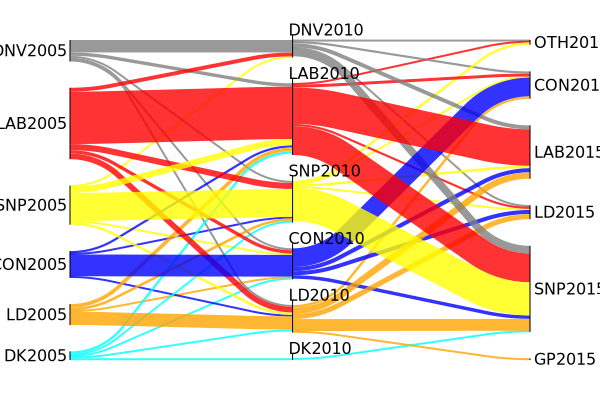

In [15]:
SVG(sankey.svg)

In [17]:
sankey.save_png(filename="scotland.png")

In [9]:
BES_numeric = pd.read_hdf( BES_data_folder+"BESW8numeric.hdf", "BESW8numeric" )
print("BES_numeric",  BES_numeric.shape )

BES_numeric (31409, 659)


In [10]:
fname = BES_data_folder+"cat_dictionary"+".pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
print("cat_dictionary", len( cat_dictionary ) )

cat_dictionary 650


In [13]:
BES_reduced_with_na = pd.read_hdf(BES_data_folder+"BES_reduced_with_na.hdf","BES_reduced_with_na")
print("BES_reduced_with_na",  BES_reduced_with_na.shape )

BES_reduced_with_na (31409, 454)


In [14]:
# for development, lets pare down the BES_Panel dataset to just the columns we're working with now
cols = ['profile_past_vote_2005',
        'profile_past_vote_2010',
        'profile_past_vote_2015',
        'generalElectionVote',
        'generalElectionVoteW9']
BES = BES_numeric[cols]
for col in cols:
    print(col)
    BES[col] = BES_numeric[col].apply( lambda x: replace_dict[cat_dictionary[col][x]]  if not np.isnan(x) else np.nan )

profile_past_vote_2005


C:\ANACON~1\envs\BES_analysis\lib\site-packages\pandas\indexes\base.py:1264: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\ANACON~1\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


profile_past_vote_2010
profile_past_vote_2015
generalElectionVote
generalElectionVoteW9


In [15]:
swingers = BES.apply(lambda x: len(x.dropna().unique())-1,axis=1)
swingers[swingers==-1]=0

In [275]:
gc.collect()

0

In [32]:
party_now = BES["generalElectionVote"] ## on even of EU referendum!
party_now.notnull().sum()

25238

In [33]:
party_now=='LAB'

0        False
1        False
2        False
3         True
4        False
5        False
6        False
7        False
8        False
9        False
10        True
11       False
12       False
13       False
14       False
15       False
16       False
17        True
18       False
19        True
20       False
21       False
22        True
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
31379     True
31380     True
31381    False
31382     True
31383    False
31384    False
31385    False
31386     True
31387     True
31388    False
31389    False
31390     True
31391    False
31392    False
31393    False
31394     True
31395     True
31396    False
31397    False
31398    False
31399    False
31400    False
31401     True
31402    False
31403    False
31404     True
31405    False
31406    False
31407     True
31408     True
Name: generalElectionVote, dtype: bool

profile_past_vote_2005_Did not vote                                0.217748
marital_Married                                                    0.211792
euMemberJoin__Strongly agree                                       0.211437
profile_past_vote_2015_Scottish National Party (SNP)               0.202245
prevJob_Yes, I have done paid work in the past                     0.199664
profile_gross_personal__Â£100,000 and over                         0.196767
profile_past_vote_2015_Labour                                      0.196554
profile_past_vote_2010_Liberal Democrats                           0.193859
al_scale__Authoritarian                                            0.172685
profile_past_vote_2015_United Kingdom Independence Party (UKIP)    0.171635
al1__Strongly agree                                                0.171625
profile_past_vote_2005_Labour Party                                0.168549
euParlOverRide__Strongly agree                                     0.162900
EUIntegratio

profile_past_vote_2010_Green Party                                    -0.466095
profile_past_vote_2005_Green Party                                    -0.449604
profile_past_vote_2015_Green Party                                    -0.398026
marital_Never married                                                 -0.248427
workingStatus_Full time university student                            -0.237653
housing_Neither I live rent-free with my parents, family or friends   -0.211110
bestPM_Jeremy Corbyn                                                  -0.181387
profile_turnout_2015_No, did not vote                                 -0.179784
pccVote1_The Green candidate                                          -0.173818
euCloser__Strongly agree                                              -0.171794
likeCorbyn__Strongly like                                             -0.167531
partyId_Green Party                                                   -0.159657
noneuMore__Many more                    

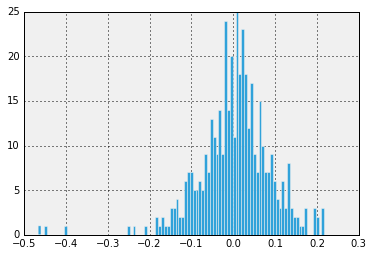

In [42]:
pnow = 'GP'
corr = BES_reduced_with_na[party_now==pnow].corrwith(swingers[party_now==pnow])
corr.sort_values().hist(bins=100)
display(corr[corr>.1].sort_values(ascending=False))
display(corr[corr<-.1].sort_values())

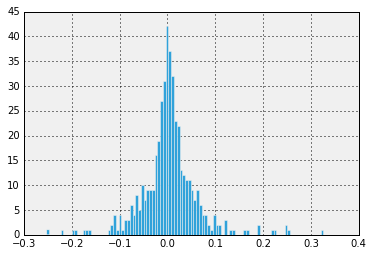

In [22]:
corr[corr>.08].sort_values()

profile_past_vote_2010_Some other party                            0.080515
profile_past_vote_2005_Green Party                                 0.080611
lr5__Strongly agree                                                0.080825
effectsEUEcon__Much better                                         0.083265
effectsEUNHS__Much better                                          0.083712
euRefVote_Leave the EU                                             0.089556
bestPM_Jeremy Corbyn                                               0.098411
partyId_No - none                                                  0.099349
lr2__Strongly agree                                                0.099712
partyId_Green Party                                                0.099766
lr3__Strongly agree                                                0.103307
profile_past_vote_2010_British National Party (BNP)                0.103698
immigCon__Allow many more                                          0.107552
partyIdEU__M

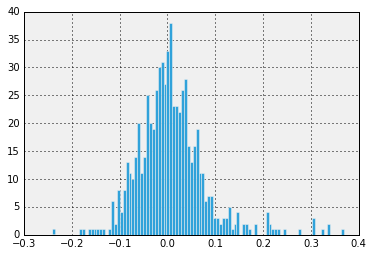

In [93]:
corr.sort_values().hist(bins=100)

In [108]:
corr[corr>.1].sort_values()

lr3                         0.103307
creditLeave_6W9             0.104275
immigCon                    0.107552
partyIdEU                   0.110990
EUContactLeaveNone          0.111015
partyContactUKIP            0.115045
ptvGrnW9                    0.116356
immigConW9                  0.116461
lr4                         0.121074
prPreferenceW9              0.123236
euID                        0.124656
partyContactUKIP_5          0.126438
efficacyPolCareW9           0.128294
profile_past_vote_2010      0.129817
efficacyPolCare             0.130385
scotElectionVoteList        0.130855
reasonNotRegistered_7       0.138103
achieveReduceImmigUKIPW9    0.141260
ptvGrn                      0.142304
euRefVotePost               0.145046
handleMIIUKIPW9             0.145260
bestOnMIIW9                 0.149440
EUContactRemainSNP          0.149968
likeFarageW9                0.157817
likeFarage                  0.158820
likeUKIPW9                  0.164365
likeUKIP                    0.166172
s

In [109]:
corr[corr<-.1]

likeCameron              -0.114115
likeOsborne              -0.109108
EUIntegrationCon         -0.112523
partyContactSNP_5        -0.143692
partyContactSNP_6        -0.104112
partyContactPC_5         -0.177449
partyContactUKIP_2       -0.136551
partyContactGreen_2      -0.155779
partyContactOther_7      -0.152578
satDemUK                 -0.110692
satDemEng                -0.120840
registeredUpToDate       -0.112817
reasonNotRegistered_4    -0.101512
reasonNotRegistered_5    -0.239837
ptvCon                   -0.113936
trustMPs                 -0.182127
pidWeTheyW9              -0.105646
pidMyPartyW9             -0.100373
pidPraiseGoodW9          -0.113196
likeCameronW9            -0.100247
trustMPsW9               -0.133293
conPriorities_immigW9    -0.104673
selfOccEmployeesLastW9   -0.165322
profile_turnout_2015     -0.101801
lr_scale                 -0.117361
dtype: float64

In [101]:
BES_Panel["bestOnMIIW8"].isnull().sum()

34259

In [106]:
BES_Panel["euRefVoteSqueezeW8"].unique()

[NaN, Leave the EU, Don't know, Stay/remain in the EU, I would/will not vote]
Categories (4, object): [Stay/remain in the EU < Leave the EU < I would/will not vote < Don't know]